# Data Mining Challenge 2020

## Team
* First-name Last-name Student-ID
* ...



# Predictive maintenance 

In this project, we want to do predictive maintenance for the faults prediction on air conditioning equipment installed in mobile network transmission sites in a 14-days forecast window. 
we have the information on **weather conditions** (past and forecast), **alarms** and **faults** that occurred on-site, **static features** of the site.

The feature distribution is in a period of 14, 7, 3 days. 

# Section One (libraries)
apply the desired libraries 

In [87]:
import pandas as pd
import numpy as np

# Statistical libraries
from scipy import stats

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Evaluation Procedures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold


# Classification methods
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesRegressor


# Evaluation Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# Feature Selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold

from sklearn.decomposition import PCA

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform

# <pde;s
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors

# Section two (functions)
Defin the functions that we will use through out our code 

This function print all the datas 

In [5]:
def print_all (to_print):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(to_print)

prints the number of number of columns without any outliers

In [6]:
def print_clean_col(X_in,mean,std):
    lower = mean - 3*std
    upper = mean + 3*std
    i=0
    for col in X_in.columns:
        outliers = ((X_in[col]>upper[col]) | (X_in[col]<lower[col])).astype(int)
        
        if (outliers.sum()>0):
            print("Variable %s (%.3f,%.3f) has %d outliers"%(col,mean[col],std[col],outliers.sum()))
        else:
            i+=1
    print('the number of cleaned columns are ', i)

Replace outliers with their upper or lower band 

In [7]:
def replace_outliers(S,mean,std):
    X =S.copy()
    lower = mean - 3*std
    upper = mean + 3*std
    for col in X.columns:
        X.loc[X[col]>upper[col], col] = upper[col]
        X.loc[X[col]<lower[col], col] = lower[col]
    
    return X

sort Numerical values function

In [8]:
# sort Numerical values function
def sorted_m3_numerical_values(numerical_df, reverse = True):
    sorted_Numerical_df = numerical_df.reindex(sorted(numerical_df.columns, reverse=reverse), axis=1)
    sorted_Numerical_columns_list = (list(sorted_Numerical_df.columns))
    New_Numerical_columns_list = []
    for column in sorted_Numerical_columns_list:
        New_column = column.replace('_',' ')
        New_Numerical_columns_list.append(New_column)

    New_Numerical_columns_list.sort(key=lambda s: s.split()[1])

    sorted_Numerical_columns_list.clear()
    for column in New_Numerical_columns_list:
        New_column = column.replace(' ','_')
        sorted_Numerical_columns_list.append(New_column)

    #drop the dataframe
    sorted_Numerical_df = sorted_Numerical_df.iloc[0:0]

    sorted_Numerical_df = numerical_df[sorted_Numerical_columns_list]
    return sorted_Numerical_df


This method receive a coorelation an df as input and check if  two features  have a correlation higher than 0.9 or not

In [9]:
# This method receive a coorelation an df as input and check if  two features  have a correlation higher than 0.9 or not
def compare_corr_values(corr, df_):
  columns = np.full((corr.shape[0],), True, dtype=bool)
  for i in range(corr.shape[0]):
      for j in range(i+1, corr.shape[0]):
          if corr.iloc[i,j] >= 0.84:
              if columns[j]:
                  columns[j] = False
  selected_columns = df_.columns[columns]
  df_ = df_[selected_columns]
  return df_

This method normalize a data set. it can return a `Numpy` *array* if set `return_df` to `True` a dataframe on default. Also it can do 2 types of normalization you can set `is_standard` to `False` so you can have `MinMaxScaler`, or `StandardScaler` by default.

In [10]:
def normalizer_df(df, return_df = False, is_standard = True, range_to_put = (-1, 1)):
    df = df.copy()
    st_x= StandardScaler()
    norm_x = MinMaxScaler(feature_range = range_to_put)
    if is_standard:
        if return_df:
            df[df.columns] = st_x.fit_transform(df[df.columns])
            return df
        else:
            return st_x.fit_transform(df)
    else:
        if return_df:
            df[df.columns] = norm_x.fit_transform(df[df.columns])
            return df
        else:
            return norm_x.fit_transform(df)

This method helps up to evaluate a baseline performance. it takes a model and inputs and outputs and provides us with a metric

In [11]:
def evaluate_model_baseLine(model, X_in,y_in):
    variance_model = LogisticRegression()
    variance_scores = cross_val_score(model, X_in, y_in, cv=kfolds)
    print("Variance Model R2 Mean %.3f StdDev %.3f"%(variance_scores.mean(),variance_scores.std()))

# Section Three (preprocessing)
Apply data preprocessing we can see that the categorical datas are already One-Hot encoded 

### 3.1 loading the data

`Notice` google drive 

In [12]:
# Loading the DATA  for Daniel, 
#Don't use it if you don't want to mount your google drive with google colab
# from google.colab import drive
# drive.mount('/content/drive',force_remount=Truimport os 
# cwd = os.getcwd()
# dataset_dir = os.path.join(cwd, 'DMTMDataset')
# #train_df=pd.read_csv(os.path.join(dataset_dir,'train.csv'))
# dataset_direction='/content/drive/MyDrive/DMTMDataset/'
# train_df=open(os.path.join(dataset_direction,'train.csv'))
# df=pd.read_csv((train_df))
# dfe)


In [13]:
df = pd.read_csv('test.csv')

### 3.2 Data Quality assurnace 
we should check for:

#### 3.2.1- null and missing values 

In [14]:
# check for the null 
df.isnull().sum().sum()

0

we see that there are no NaN values

#### 3.2.2- inconsistant values 

In [15]:
print_all(df.dtypes)

SITE_ID                                  int64
DATE                                    object
CELL_TYPE_Macro                          int64
CELL_TYPE_Mobil                          int64
CELL_TYPE_TRP                            int64
CELL_TYPE_Tx site                        int64
CELL_TYPE_micro                          int64
N_TRANSPORTED_SITES                    float64
GEOGRAPHIC_CLUSTER_K_0                   int64
GEOGRAPHIC_CLUSTER_K_1                   int64
GEOGRAPHIC_CLUSTER_K_2                   int64
GEOGRAPHIC_CLUSTER_K_3                   int64
GEOGRAPHIC_CLUSTER_K_4                   int64
GEOGRAPHIC_CLUSTER_K_5                   int64
GEOGRAPHIC_CLUSTER_K_6                   int64
GEOGRAPHIC_CLUSTER_K_7                   int64
GEOGRAPHIC_CLUSTER_K_8                   int64
GEOGRAPHIC_CLUSTER_K_9                   int64
aircon_sum_wo_prev7d                   float64
aircon_sum_wo_prev14d                  float64
mean_temperature_prev7d                float64
max_temperatu

we want to check if the data inside a column are all from the same type and we don't have irrelevant values

#### 3.2.3- duplicates

In [16]:
# remove the duplicates if any 
df = df.drop_duplicates()

In [17]:
# drop the unused columns
df = df.drop(columns=['SITE_ID','DATE'])

Now we check for inconsistent values
First we take the range and variance for each column 

In [18]:
col_max = df.max(axis=0)

In [21]:
col_min = df.min(axis=0)

In [22]:
df_range = col_max - col_min
df_range

CELL_TYPE_Macro                     1.00
CELL_TYPE_Mobil                     1.00
CELL_TYPE_TRP                       0.00
CELL_TYPE_Tx site                   1.00
CELL_TYPE_micro                     1.00
                                   ...  
kurt_equipment_alarms_prev14d      30.62
kurt_fire/smoke_alarms_prev14d      3.92
kurt_ge_alarms_prev14d             15.47
kurt_power_alarms_prev14d          32.66
kurt_temperature_alarms_prev14d     9.02
Length: 133, dtype: float64

In [23]:
print_all(df_range.sort_values())

ge_min_persistance_prev7d                  0.00
CELL_TYPE_TRP                              0.00
fire/smoke_min_persistance_prev7d          0.00
CELL_TYPE_Macro                            1.00
GEOGRAPHIC_CLUSTER_K_9                     1.00
GEOGRAPHIC_CLUSTER_K_8                     1.00
GEOGRAPHIC_CLUSTER_K_7                     1.00
GEOGRAPHIC_CLUSTER_K_6                     1.00
GEOGRAPHIC_CLUSTER_K_4                     1.00
GEOGRAPHIC_CLUSTER_K_5                     1.00
GEOGRAPHIC_CLUSTER_K_2                     1.00
GEOGRAPHIC_CLUSTER_K_1                     1.00
GEOGRAPHIC_CLUSTER_K_0                     1.00
CELL_TYPE_micro                            1.00
CELL_TYPE_Tx site                          1.00
CELL_TYPE_Mobil                            1.00
GEOGRAPHIC_CLUSTER_K_3                     1.00
skew_fire/smoke_alarms_prev14d             2.92
kurt_fire/smoke_alarms_prev14d             3.92
aircon_sum_wo_prev7d                       4.00
skew_temperature_alarms_prev14d         

we see that the range and max and min of some cells all together are always zero so it is useless to have it in our datas so we drop it

In [24]:
non_zero_keys = []
for key in df_range.index:
    value= df_range[key]
    if value == 0:
        df = df.drop(columns = [key])


In [25]:
df_mean = df.mean()

In [26]:
df_var = df.var()

In [27]:
df_std = df.std()

Data can be inconsistent if there is an irrelevant value so we should print all of them to se if there is some inconsistency 

In [28]:
df_sem = df.sem()

In [31]:
print_all(df.columns)

Index(['CELL_TYPE_Macro', 'CELL_TYPE_Mobil', 'CELL_TYPE_Tx site',
       'CELL_TYPE_micro', 'N_TRANSPORTED_SITES', 'GEOGRAPHIC_CLUSTER_K_0',
       'GEOGRAPHIC_CLUSTER_K_1', 'GEOGRAPHIC_CLUSTER_K_2',
       'GEOGRAPHIC_CLUSTER_K_3', 'GEOGRAPHIC_CLUSTER_K_4',
       ...
       'skew_equipment_alarms_prev14d', 'skew_fire/smoke_alarms_prev14d',
       'skew_ge_alarms_prev14d', 'skew_power_alarms_prev14d',
       'skew_temperature_alarms_prev14d', 'kurt_equipment_alarms_prev14d',
       'kurt_fire/smoke_alarms_prev14d', 'kurt_ge_alarms_prev14d',
       'kurt_power_alarms_prev14d', 'kurt_temperature_alarms_prev14d'],
      dtype='object', length=130)


from the statistics above we can understand that it is possible that we have outliers so first we check if there is any Inconsistentcy in the types of the data and then we plot to understand better how can we remove the outliers 

As we can see there are no inconsistentcies in the types sp we continue with data visualisation 

### 3.3 Data visualisation

In here first we try to visualize our data and understand better their distribution

array([[<AxesSubplot:title={'center':'CELL_TYPE_Macro'}>,
        <AxesSubplot:title={'center':'CELL_TYPE_Mobil'}>,
        <AxesSubplot:title={'center':'CELL_TYPE_Tx site'}>,
        <AxesSubplot:title={'center':'CELL_TYPE_micro'}>,
        <AxesSubplot:title={'center':'N_TRANSPORTED_SITES'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_0'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_1'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_2'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_3'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_4'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_5'}>],
       [<AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_6'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_7'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_8'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_9'}>,
        <AxesSubplot:title={'center':'aircon_sum_wo_p

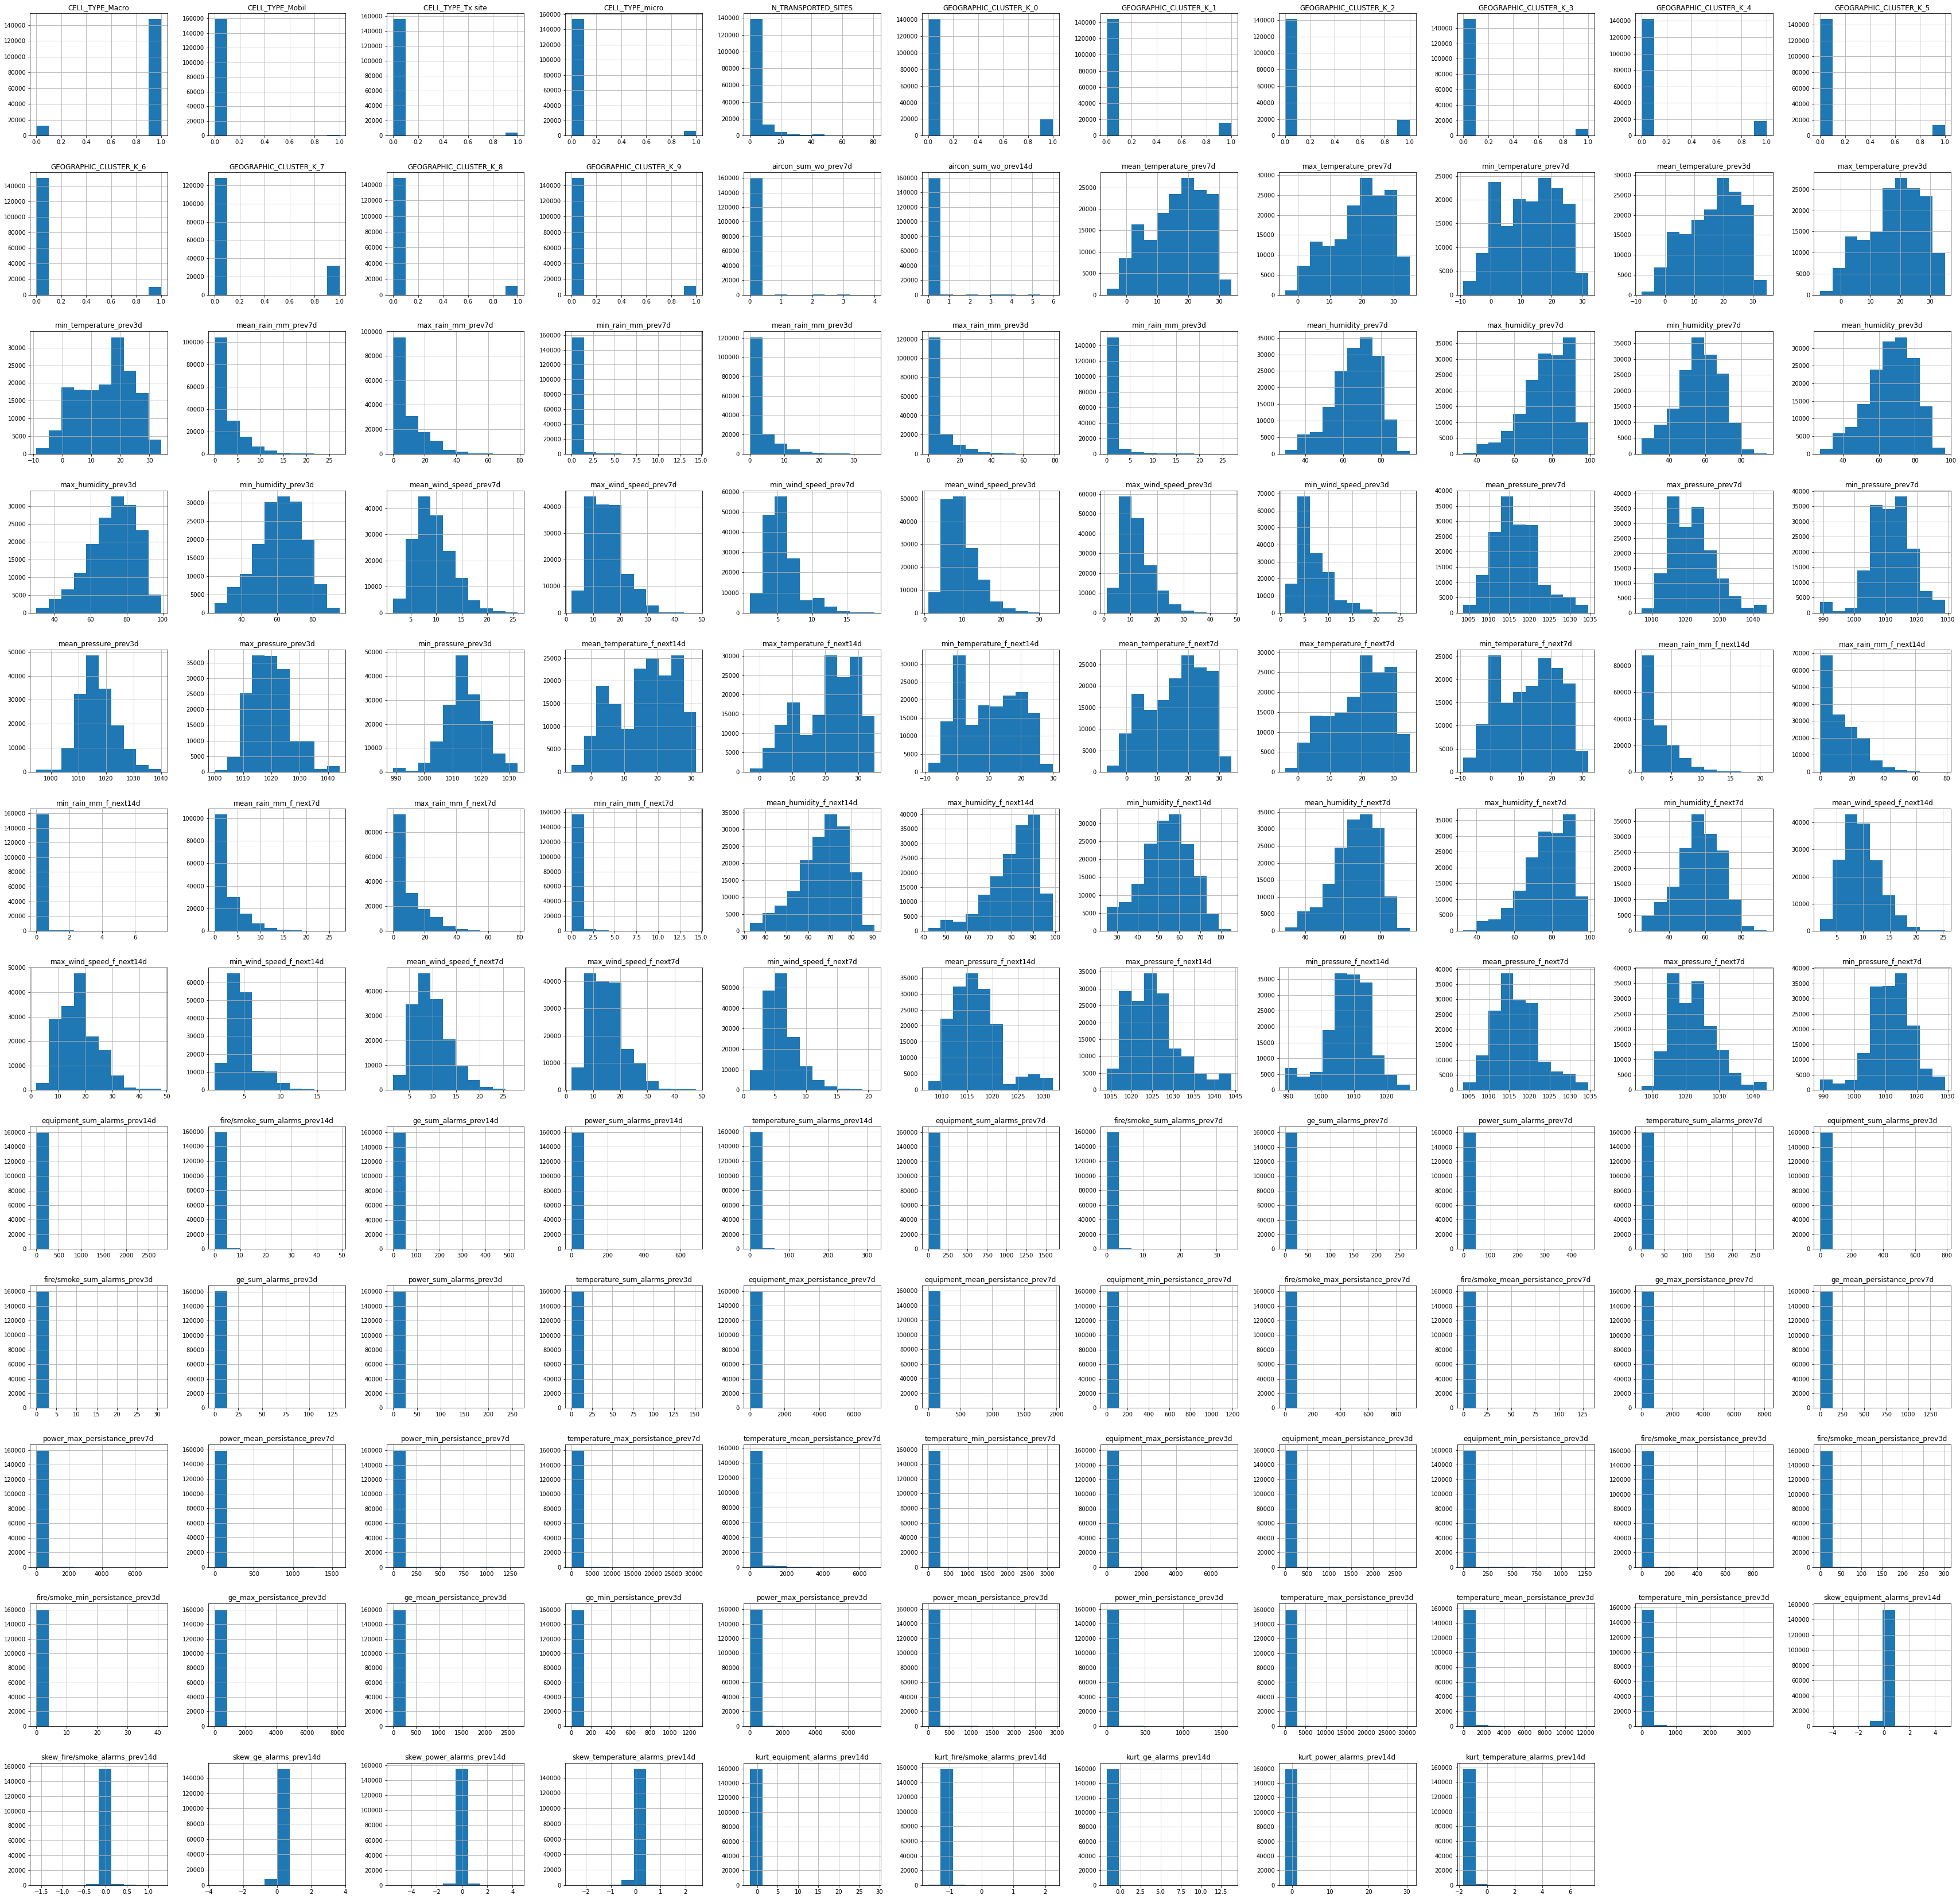

In [29]:
df.hist(figsize = (60,60))

as we can see in the data visualization part we have different types of distributions for our data.

### 3.4 OutLier Analysis

for our analysis as we anticipated before we should Separate our data and group them by their types of Distribution. 
separating the categorical with numerical *********

In [32]:
categorical_df = pd.concat([df.loc[: ,'CELL_TYPE_Macro':'CELL_TYPE_micro'], df.loc[: ,'GEOGRAPHIC_CLUSTER_K_0':'GEOGRAPHIC_CLUSTER_K_9']], axis = 1)
aircon_sum_wo_df = df.loc[:, 'aircon_sum_wo_prev7d' : 'aircon_sum_wo_prev14d']
n_transported_sites = df.loc[:,'N_TRANSPORTED_SITES']

In [ ]:
df.head()

In [33]:
#Sort alarm's correlated columns 
sorted_sum_alarm_df = df.loc[: , 'equipment_sum_alarms_prev14d':'temperature_sum_alarms_prev3d']
sorted_sum_alarm_df = sorted_sum_alarm_df.reindex(sorted(sorted_sum_alarm_df.columns, reverse=True), axis=1)## alarms

#Sort persistance's correlated columns
sorted_persistance_df = (df.loc[:, 'equipment_max_persistance_prev7d': 'temperature_min_persistance_prev3d'])
sorted_persistance_df = sorted_persistance_df.reindex(sorted(sorted_persistance_df.columns, reverse=True), axis=1)## persistance


#sort Numerical's  columns 
sorted_numerical_df = df.loc[: , 'mean_temperature_prev7d':'min_pressure_f_next7d']## Numerical
sorted_numerical_df = sorted_m3_numerical_values(sorted_numerical_df) 

#Skewness and Kurt
skew_cat_alarms_prev14d = df.loc[:,'skew_equipment_alarms_prev14d': 'skew_temperature_alarms_prev14d']
kurt_cat_alarms_prev14d = df.loc[:,'kurt_equipment_alarms_prev14d': 'kurt_temperature_alarms_prev14d']
skwurt = pd.concat([skew_cat_alarms_prev14d,kurt_cat_alarms_prev14d],axis=1)### Skewness and kurt together

all_numerical_df = pd.concat([sorted_numerical_df,sorted_sum_alarm_df,sorted_persistance_df,skwurt],axis=1)

array([[<AxesSubplot:title={'center':'skew_equipment_alarms_prev14d'}>,
        <AxesSubplot:title={'center':'skew_fire/smoke_alarms_prev14d'}>,
        <AxesSubplot:title={'center':'skew_ge_alarms_prev14d'}>],
       [<AxesSubplot:title={'center':'skew_power_alarms_prev14d'}>,
        <AxesSubplot:title={'center':'skew_temperature_alarms_prev14d'}>,
        <AxesSubplot:title={'center':'kurt_equipment_alarms_prev14d'}>],
       [<AxesSubplot:title={'center':'kurt_fire/smoke_alarms_prev14d'}>,
        <AxesSubplot:title={'center':'kurt_ge_alarms_prev14d'}>,
        <AxesSubplot:title={'center':'kurt_power_alarms_prev14d'}>],
       [<AxesSubplot:title={'center':'kurt_temperature_alarms_prev14d'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

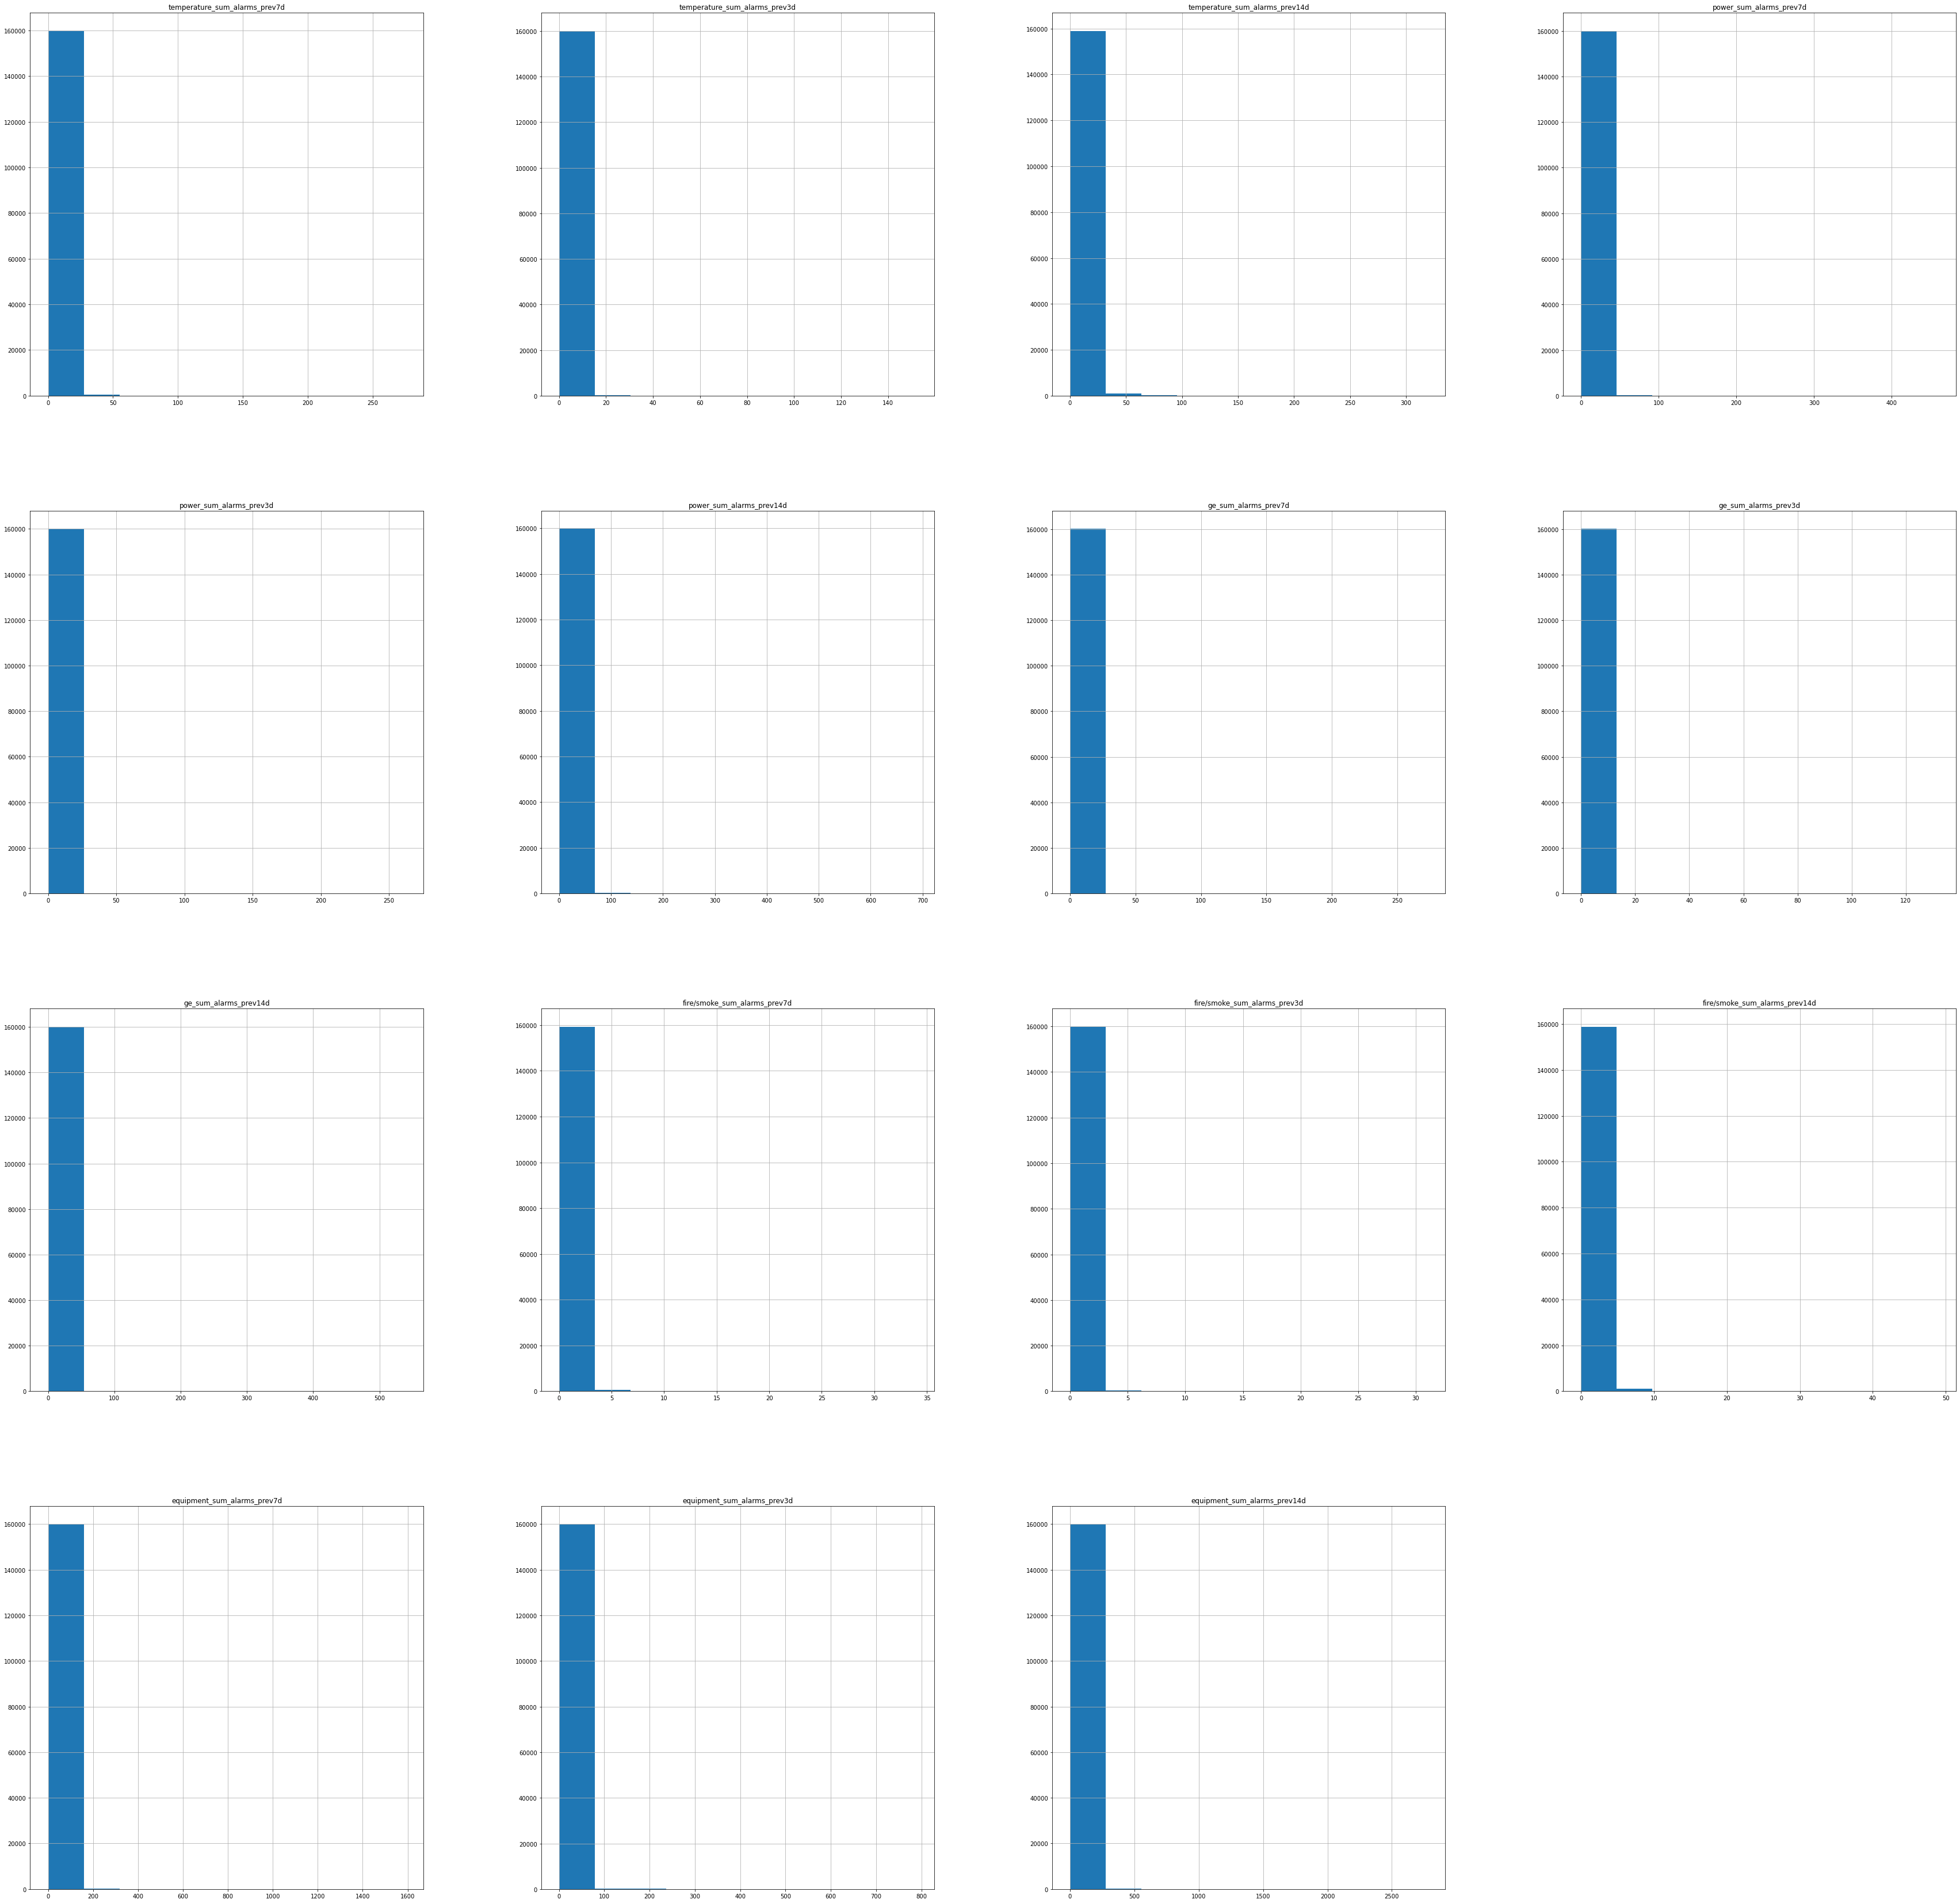

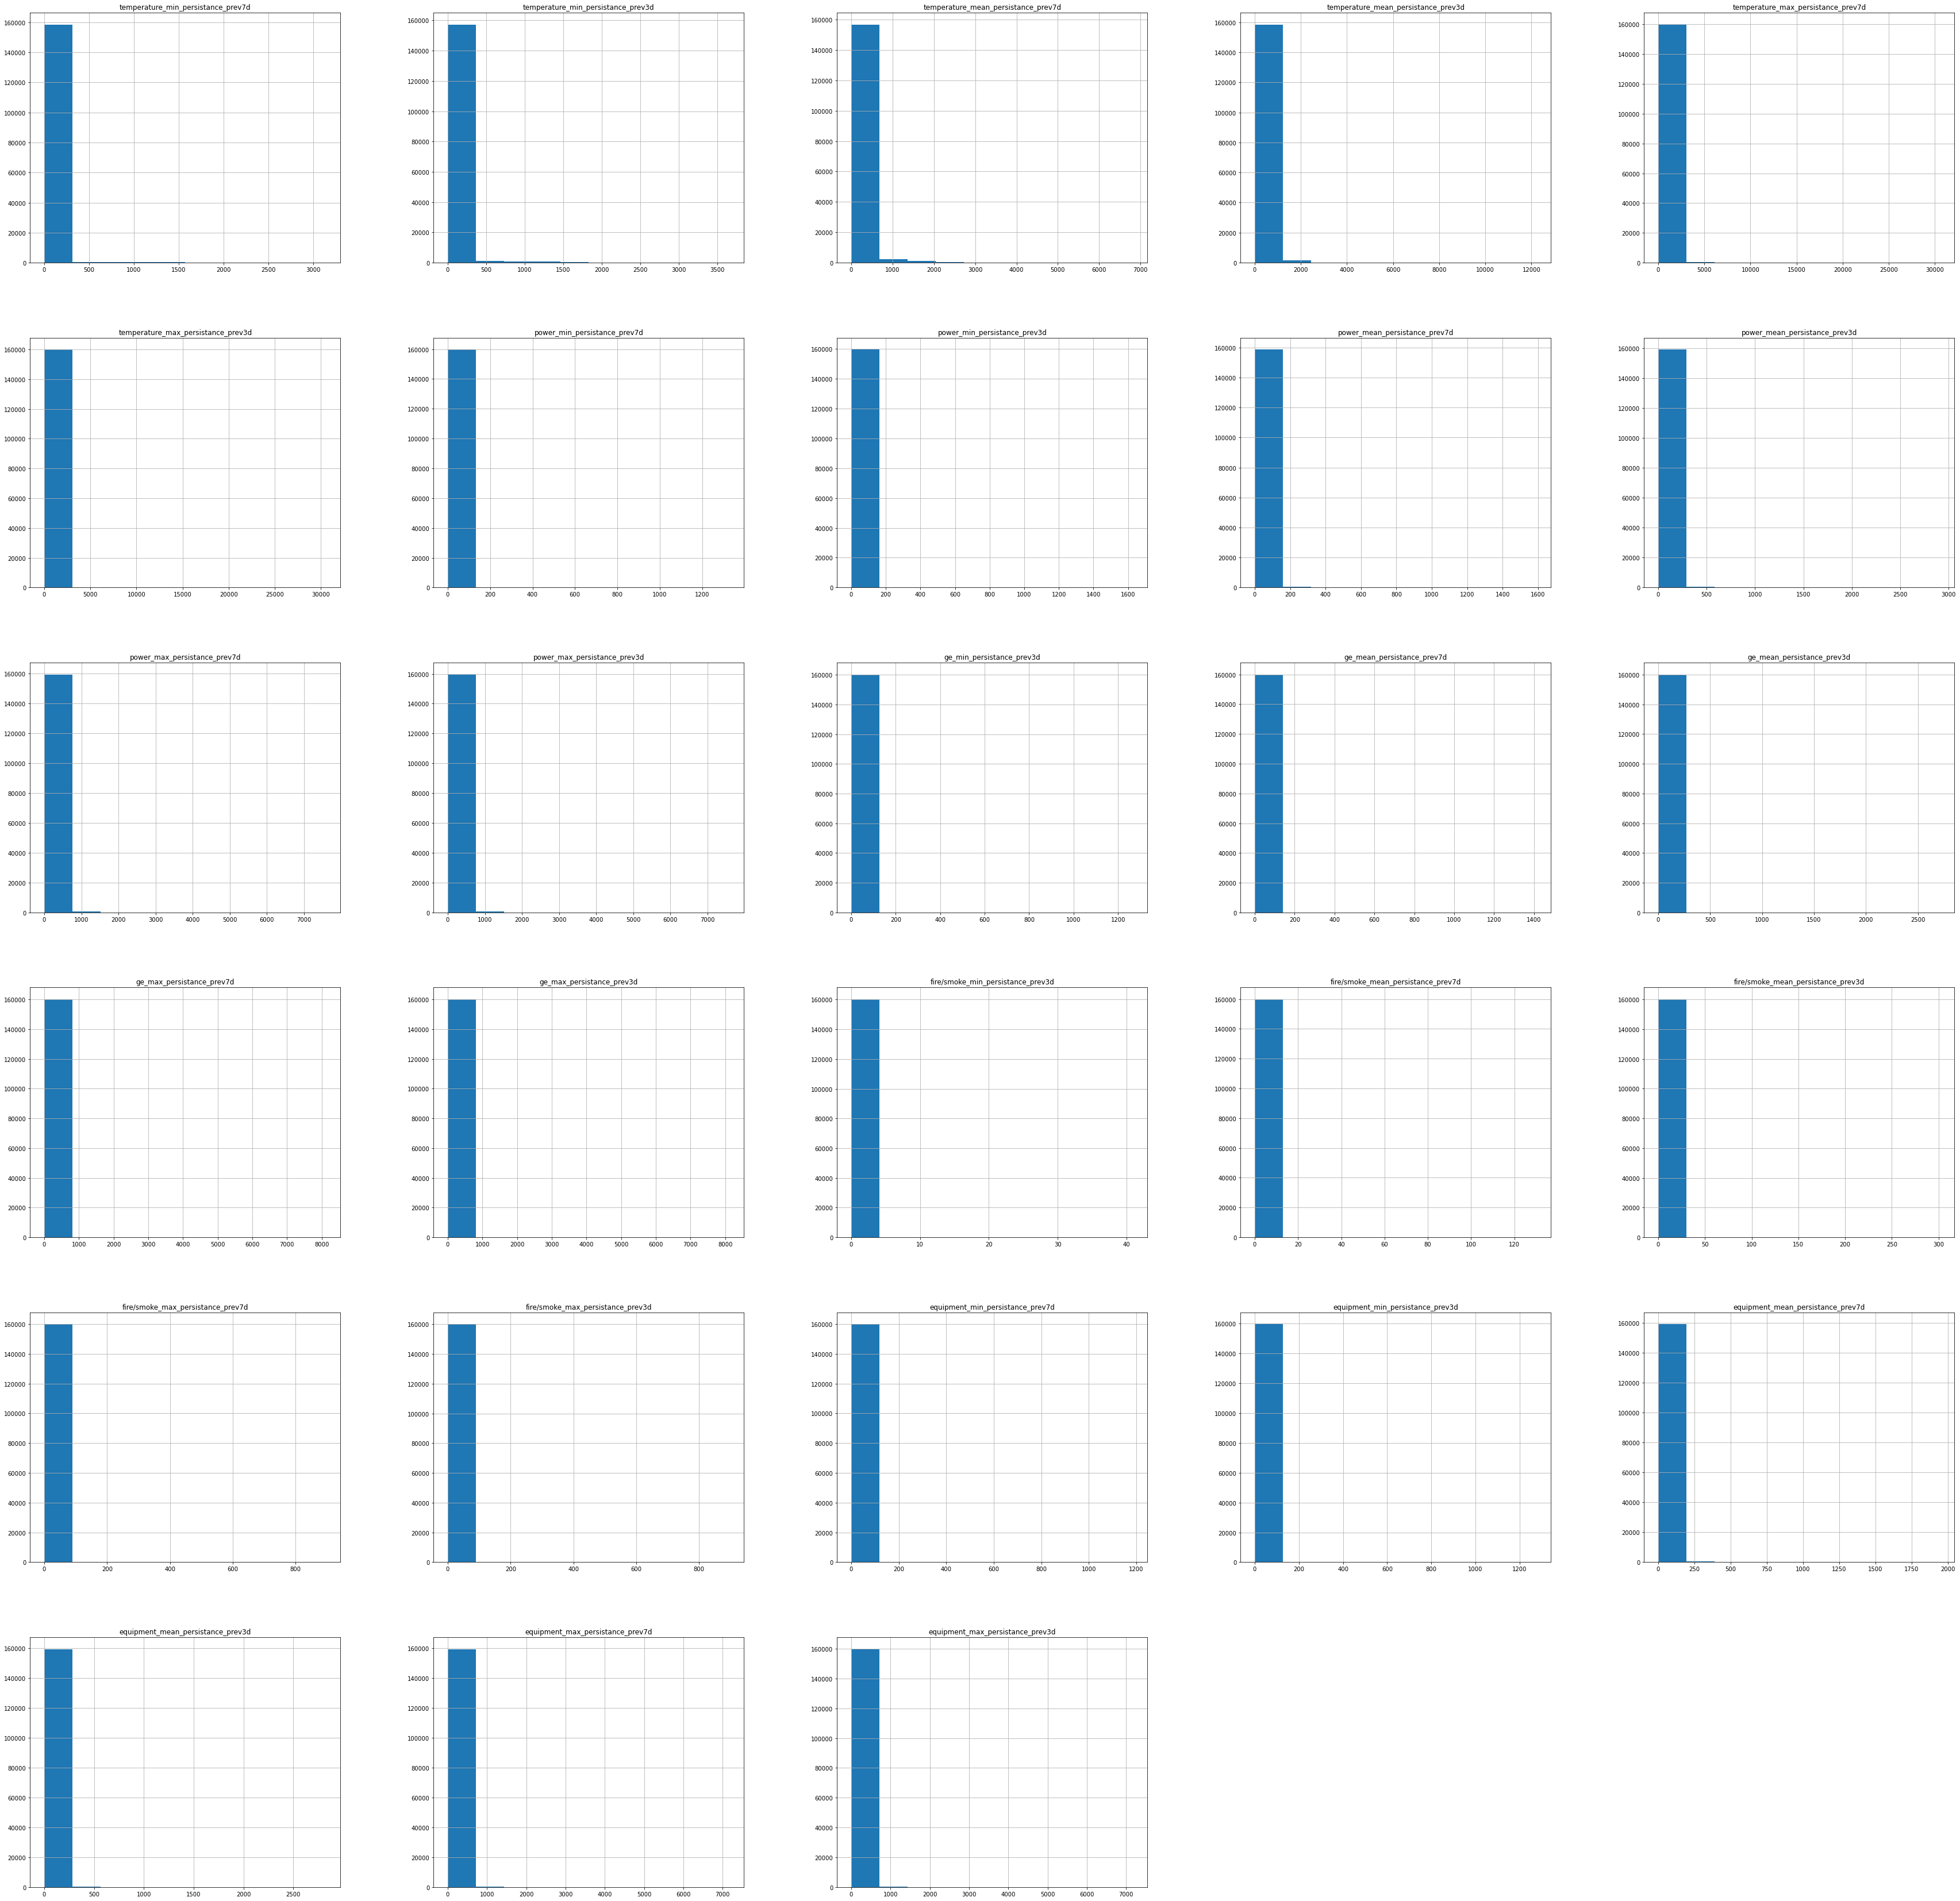

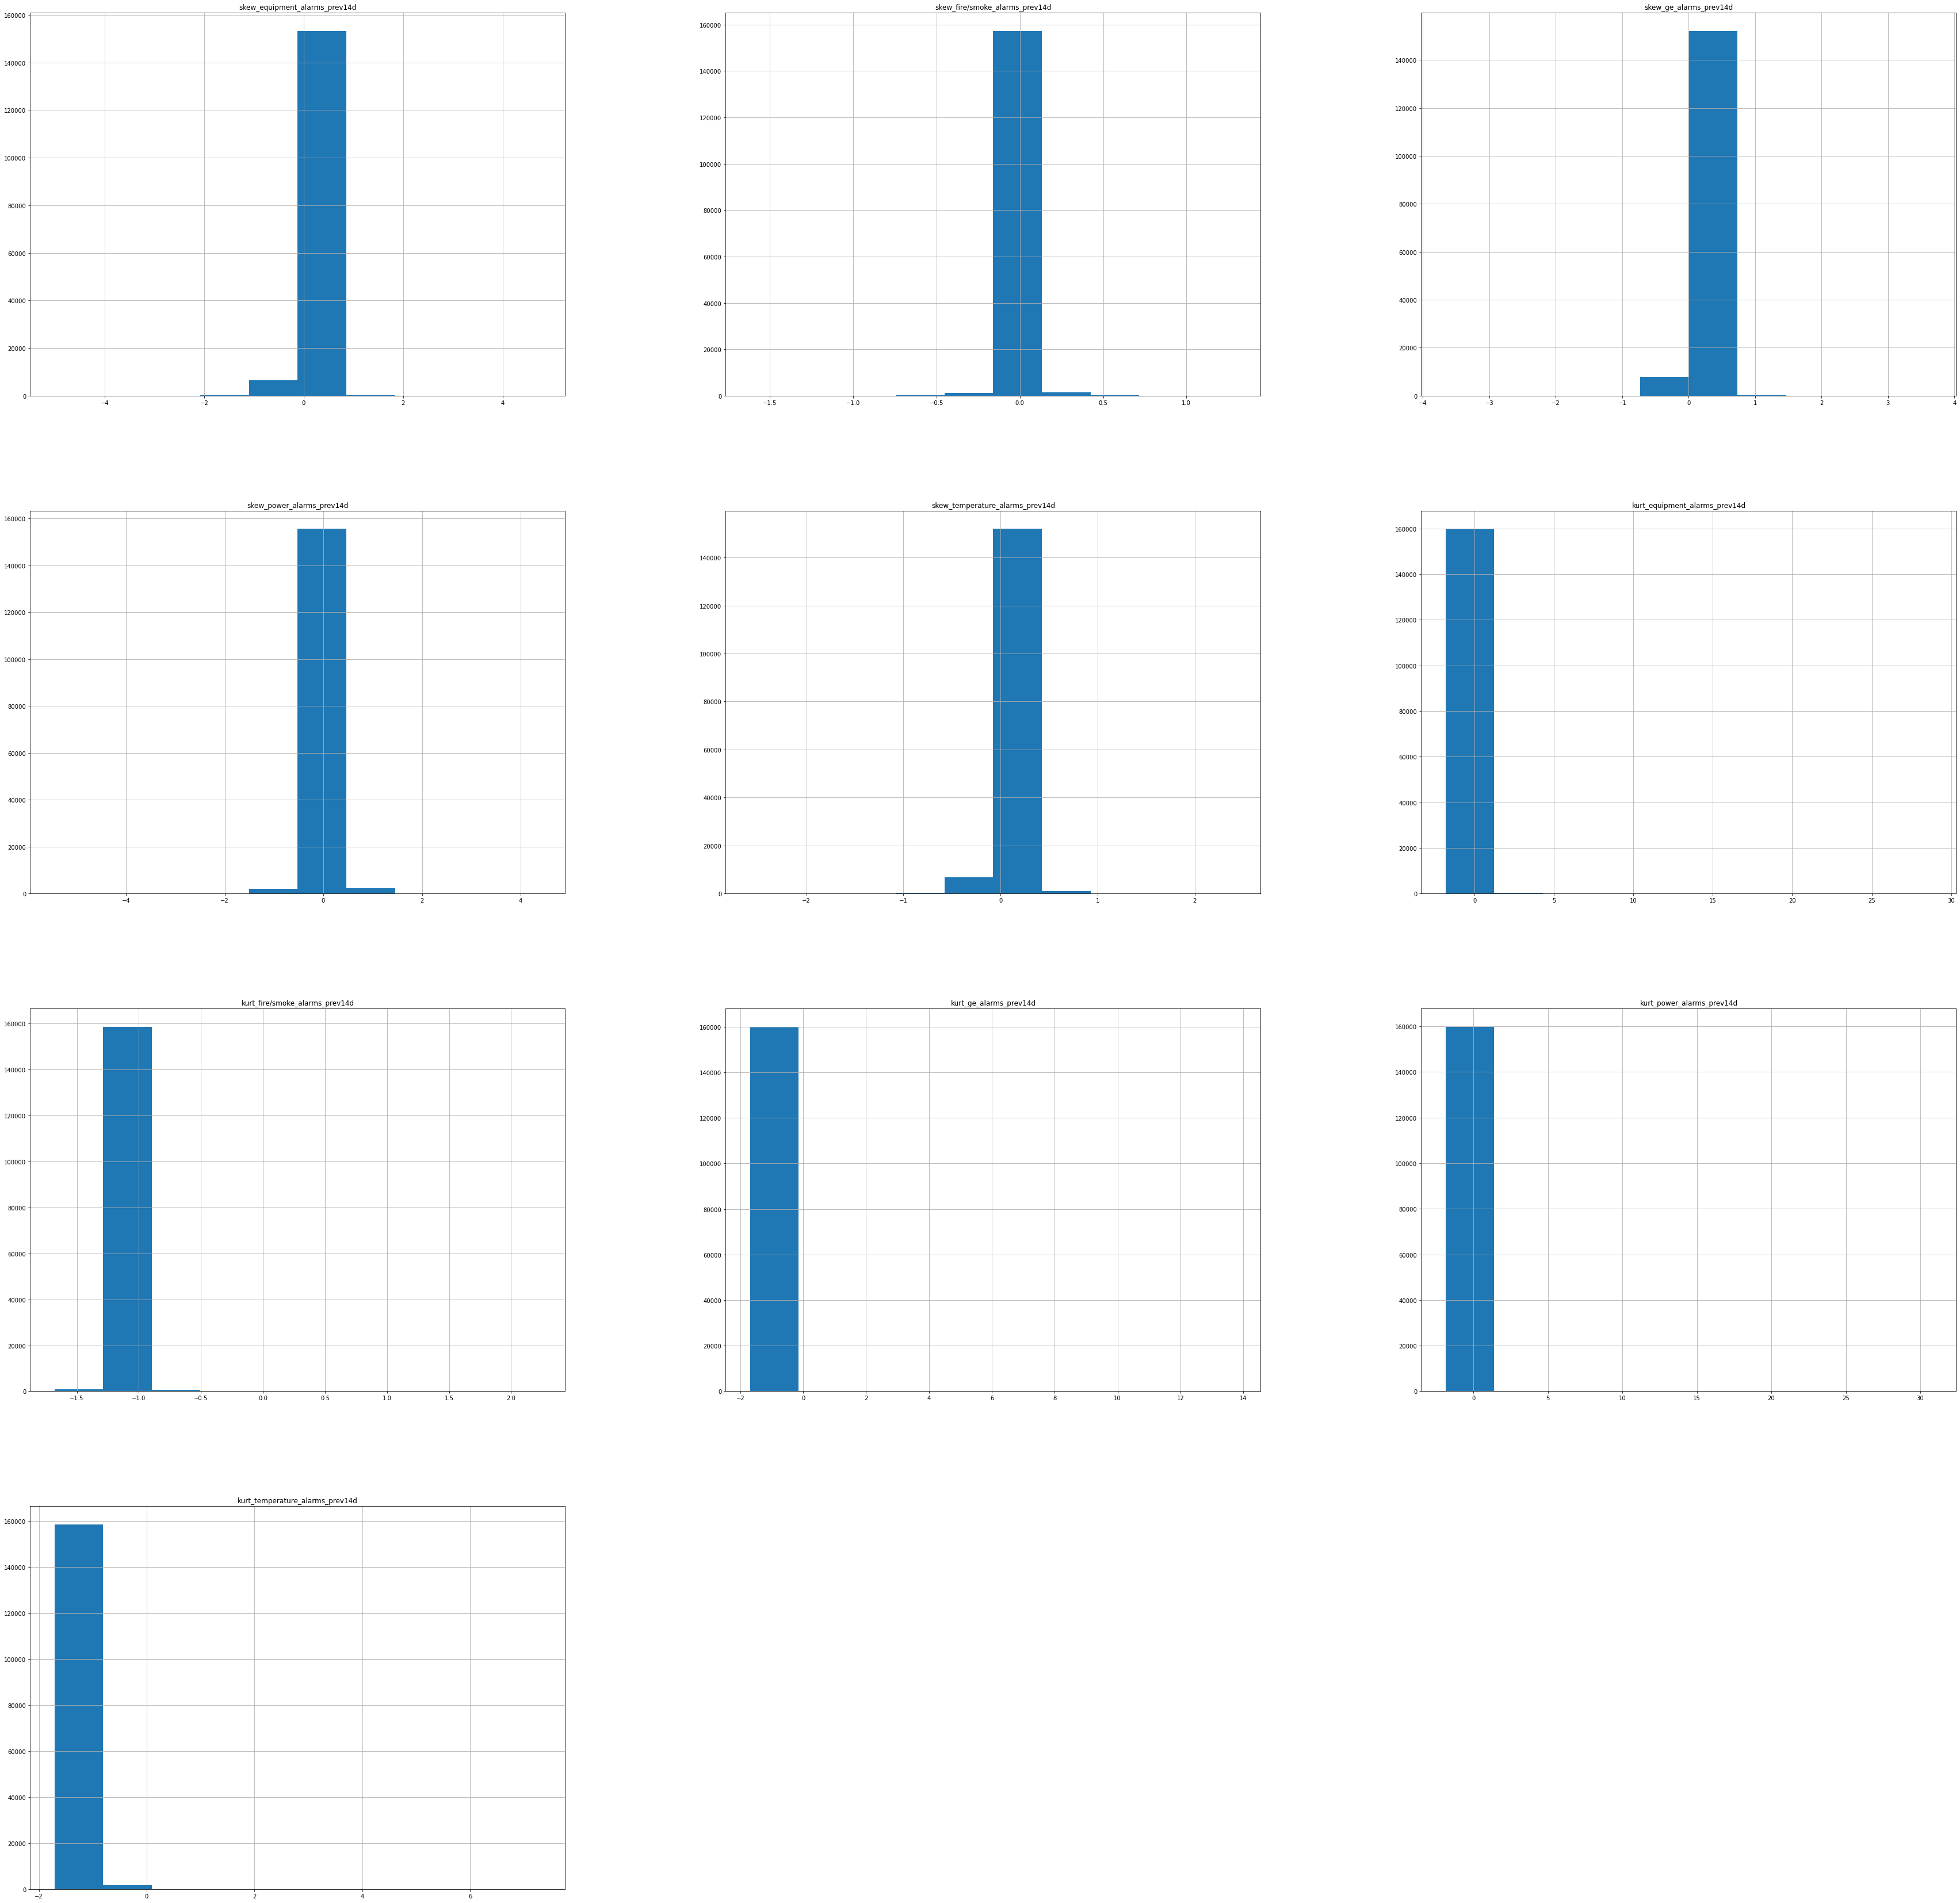

In [34]:
sorted_sum_alarm_df.hist(figsize = (60,60))
sorted_persistance_df.hist(figsize = (60,60))
skwurt.hist(figsize = (60,60))

we can see these types of distribution associated to these group are some how normal so we can use a power transform to make them guassian like. accordingly the so caled transformation scale down all the features showing us a better visualization of outliers. there by is not needed any more to use `StandardScalar()`

In [35]:
all_numerical_df_np = power_transform(all_numerical_df, method = 'yeo-johnson')

after the transformation we get a numpy array we need to convert it again to a data frame

In [37]:
all_numerical_df = pd.DataFrame(all_numerical_df_np, columns = all_numerical_df.columns)

array([[<AxesSubplot:title={'center':'min_humidity_prev7d'}>,
        <AxesSubplot:title={'center':'min_humidity_prev3d'}>,
        <AxesSubplot:title={'center':'min_humidity_f_next7d'}>,
        <AxesSubplot:title={'center':'min_humidity_f_next14d'}>,
        <AxesSubplot:title={'center':'mean_humidity_prev7d'}>,
        <AxesSubplot:title={'center':'mean_humidity_prev3d'}>,
        <AxesSubplot:title={'center':'mean_humidity_f_next7d'}>,
        <AxesSubplot:title={'center':'mean_humidity_f_next14d'}>,
        <AxesSubplot:title={'center':'max_humidity_prev7d'}>,
        <AxesSubplot:title={'center':'max_humidity_prev3d'}>,
        <AxesSubplot:title={'center':'max_humidity_f_next7d'}>],
       [<AxesSubplot:title={'center':'max_humidity_f_next14d'}>,
        <AxesSubplot:title={'center':'min_pressure_prev7d'}>,
        <AxesSubplot:title={'center':'min_pressure_prev3d'}>,
        <AxesSubplot:title={'center':'min_pressure_f_next7d'}>,
        <AxesSubplot:title={'center':'min_pressu

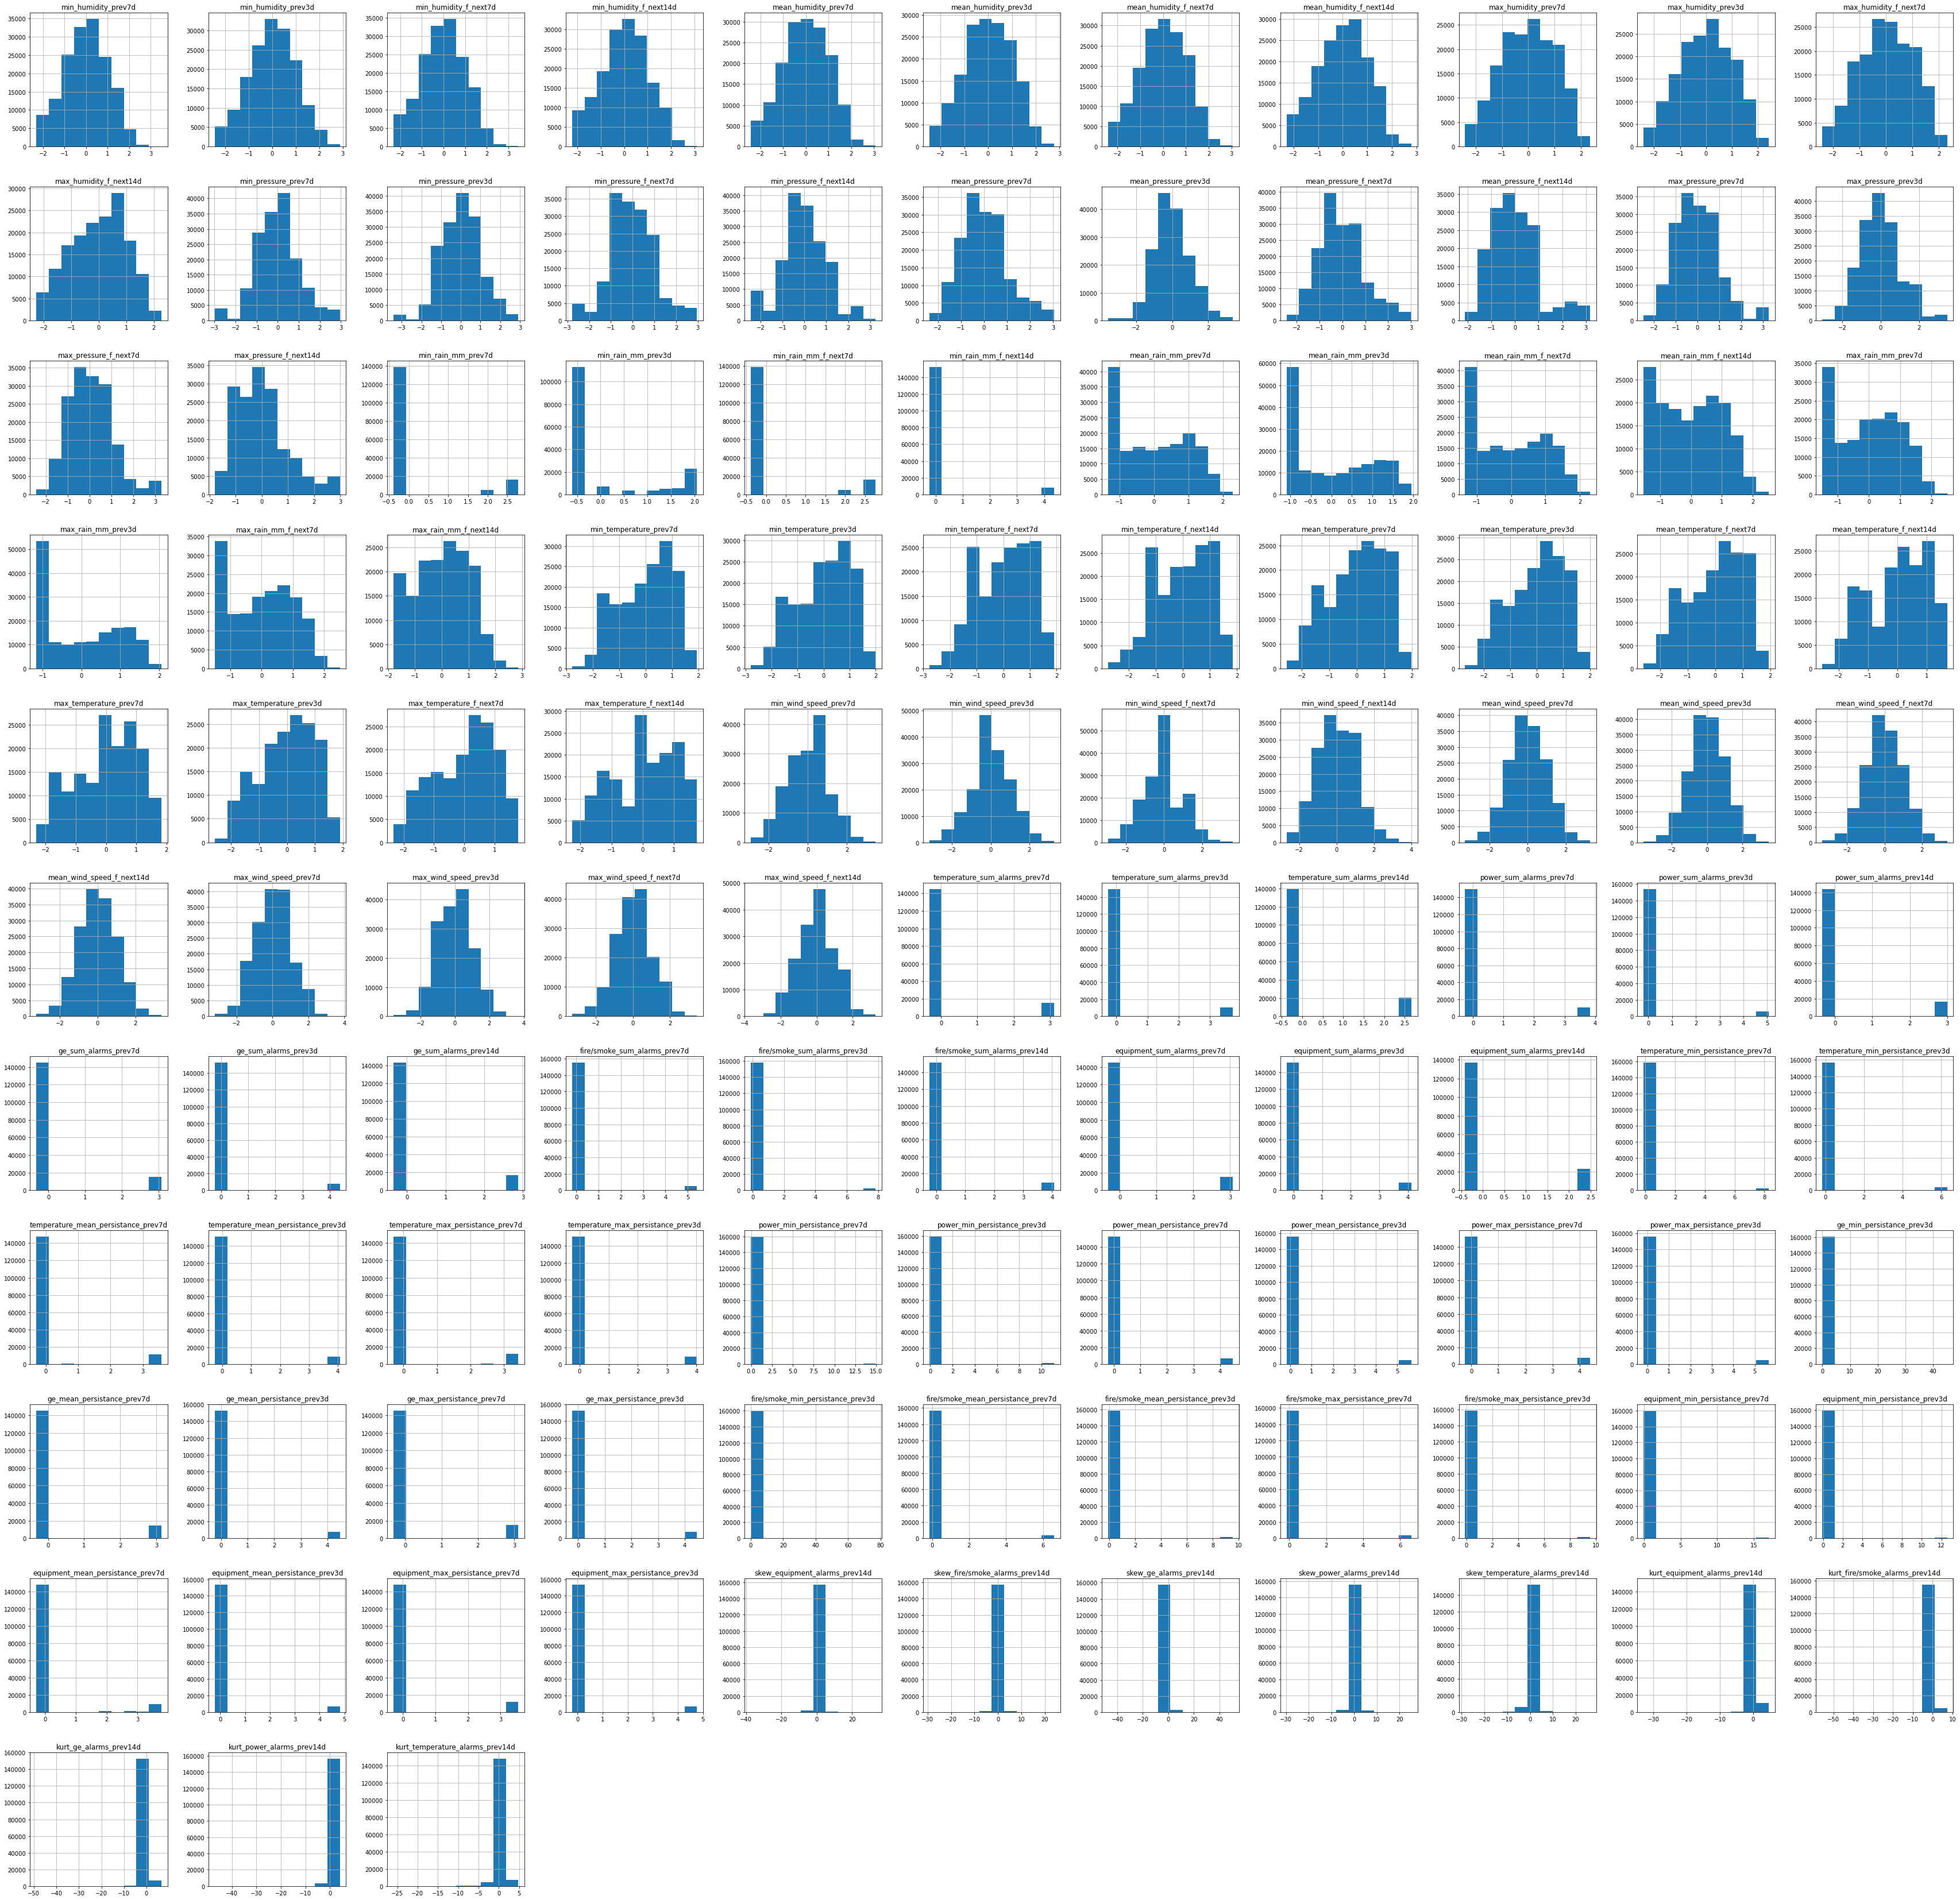

In [38]:
all_numerical_df.hist(figsize=(60,60))

In [39]:
all_numerical_df_mean = all_numerical_df.mean()
all_numerical_df_std = all_numerical_df.std()

In [40]:
all_numerical_df = replace_outliers(all_numerical_df, all_numerical_df_mean, all_numerical_df_std)

In [41]:
print_clean_col(all_numerical_df, all_numerical_df_mean, all_numerical_df_std)

the number of cleaned columns are  113


As you can see almost all outliers are deleted

In [42]:
#Sort alarm's correlated columns 
sorted_sum_alarm_df = all_numerical_df.loc[: , 'temperature_sum_alarms_prev7d':'equipment_sum_alarms_prev14d' ]
# sorted_sum_alarm_df = sorted_sum_alarm_df.reindex(sorted(sorted_sum_alarm_df.columns, reverse=False), axis=1)## alarms

#Sort persistance's correlated columns
sorted_persistance_df = all_numerical_df.loc[:, 'temperature_min_persistance_prev7d': 'equipment_max_persistance_prev3d']
# sorted_persistance_df = sorted_persistance_df.reindex(sorted(sorted_persistance_df.columns, reverse=False), axis=1)## persistance


#sort Numerical's  columns 
sorted_numerical_df = all_numerical_df.loc[: , 'min_humidity_prev7d':'max_wind_speed_f_next14d']## Numerical
# sorted_numerical_df = sorted_m3_numerical_values(sorted_numerical_df, False) 

#Skewness and Kurt
skew_cat_alarms_prev14d = all_numerical_df.loc[:,'skew_equipment_alarms_prev14d': 'skew_temperature_alarms_prev14d']
kurt_cat_alarms_prev14d = all_numerical_df.loc[:,'kurt_equipment_alarms_prev14d': 'kurt_temperature_alarms_prev14d']
skwurt = pd.concat([skew_cat_alarms_prev14d,kurt_cat_alarms_prev14d],axis=1)### Skewness and kurt together

### 3.5 Feature Aggregation 

This results in reduction of memory consumption and processing time
Aggregations provide us with a high-level view of the data as the behaviour of groups or aggregates is more stable than individual data objects

Now that we don't have outliers anymore we should try to reduce the number of features that we have.



In [43]:
# copy
snv = sorted_numerical_df.copy()
index = 0
counter = len(snv.columns)

#create an empty celane_df_ to save pruned numerical feature
pruned_num_df = snv.iloc[0:0, 0:0]

while(index < counter):
    i = 0
    cl = snv.iloc[:, index:index+4]
    pruned_num_df['ind_'+snv.columns[index]] = ((cl.iloc[:,i]/7) + (cl.iloc[:,i+1]/3) + (cl.iloc[:, i+2]/7) + (cl.iloc[:, i+3]/14))* 3/2

    index+=4

pruned_num_df

,ind_min_humidity_prev7d,ind_mean_humidity_prev7d,ind_max_humidity_prev7d,ind_min_pressure_prev7d,ind_mean_pressure_prev7d,ind_max_pressure_prev7d,ind_min_rain_mm_prev7d,ind_mean_rain_mm_prev7d,ind_max_rain_mm_prev7d,ind_min_temperature_prev7d,ind_mean_temperature_prev7d,ind_max_temperature_prev7d,ind_min_wind_speed_prev7d,ind_mean_wind_speed_prev7d,ind_max_wind_speed_prev7d
0,-0.430387,0.085927,0.468725,-0.834004,-0.728266,-0.723976,-0.493002,0.857219,0.985659,-0.434045,-0.491482,-0.509189,0.740672,1.431801,1.492263
1,0.039532,0.235075,0.393225,-0.592422,-0.771269,-0.817108,-0.106775,0.969904,0.884908,-0.411126,-0.422724,-0.406276,0.740672,1.138776,0.988351
2,0.160235,0.451481,1.142625,-0.437748,-0.707809,-0.808456,-0.106775,1.388707,1.327788,-0.388398,-0.396124,-0.311200,0.740672,1.491889,1.552682
3,0.160235,0.665392,1.142625,-0.456655,-0.459642,-0.424150,0.591725,1.399185,1.327788,-0.541479,-0.506301,-0.285966,1.342210,1.835759,1.526728
4,0.883405,0.975142,1.142625,-0.346701,-0.169439,-0.091682,0.440648,1.351853,1.327788,-0.618757,-0.663085,-0.614077,1.505190,1.797474,1.444512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160195,0.608215,1.490792,1.807231,-0.775870,-0.247494,0.362079,0.726846,1.748796,1.578258,-1.351090,-1.382825,-1.410669,-0.746470,-0.291897,0.244806
160196,0.608215,1.517432,1.653130,-0.775870,-0.253423,0.407603,0.726846,1.685694,1.535774,-1.409603,-1.446854,-1.410669,-0.334556,-0.215982,0.244806
160197,0.249499,1.305671,1.653130,-0.775870,-0.141686,0.478652,0.813782,1.698045,1.535774,-1.409603,-1.474672,-1.443541,-0.654794,-0.106802,0.388605
160198,0.273306,1.276494,1.653130,-0.413024,0.063058,0.408603,-0.493002,1.338835,1.239242,-1.409603,-1.361535,-1.219468,-0.527889,-0.122264,0.388605


after pruning we get the correlation between variables here we see that we can remove the very cirrelated features

*just as an idea between the highly correlated features we can kepp the one with the highest covariance*

<AxesSubplot:>

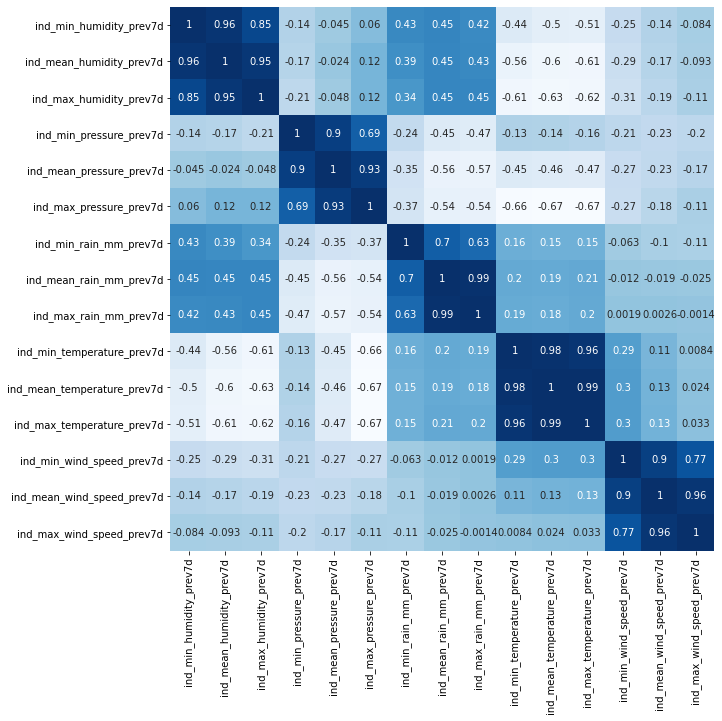

In [44]:
pruned_num_cov=pd.concat([pruned_num_df], axis=1).corr(method='pearson')
plt.figure(figsize = (10,10))
sns.heatmap(pruned_num_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

we compare the correlation between features and remove one of two features that have a correlation higher than 0.85

In [45]:
pruned_num_df = compare_corr_values(pruned_num_cov, pruned_num_df)

<AxesSubplot:>

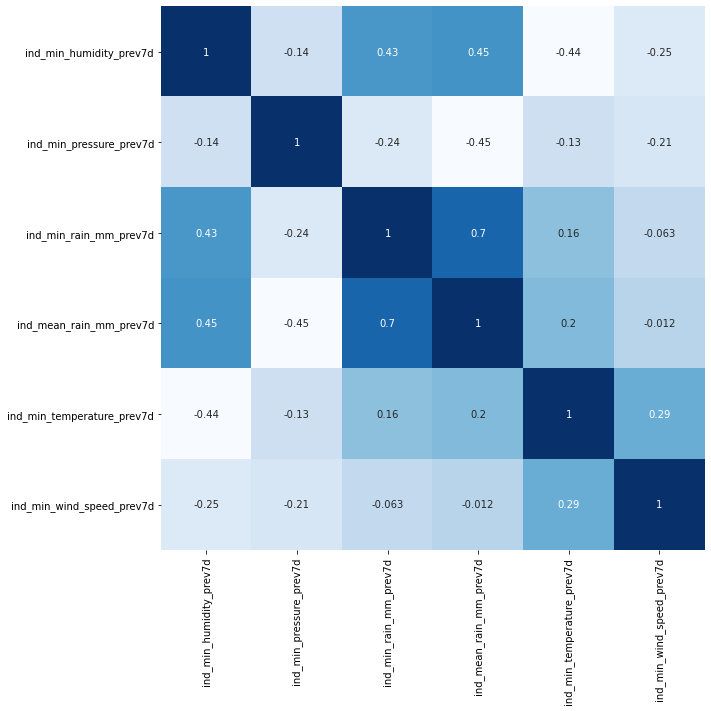

In [46]:
pruned_num_df_cov=pd.concat([pruned_num_df], axis=1).corr(method='pearson')
plt.figure(figsize = (10,10))
sns.heatmap(pruned_num_df_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

In this step we are going to prune the cat_m3_persistance_prevXd data and reduce the features. To do this we assing a weight to each Xdays (3day = 1/3, 7day = 1/7, 14day = 1/14

In [47]:
spd = sorted_persistance_df
index = 0
counter = len(spd.columns)

#create an empty celane_df_ to save pruned persistance feature
pruned_persistance_df = spd.iloc[0:0, 0:0]

while(index < counter):
    i = 0
    cl = spd.iloc[:, index:index+2]
    pruned_persistance_df['ind_'+spd.columns[index]] = ((cl.iloc[:,i]/7) + (cl.iloc[:,i+1]/3)) * 2.1

    index+=2

pruned_persistance_df

,ind_temperature_min_persistance_prev7d,ind_temperature_mean_persistance_prev7d,ind_temperature_max_persistance_prev7d,ind_power_min_persistance_prev7d,ind_power_mean_persistance_prev7d,ind_power_max_persistance_prev7d,ind_ge_min_persistance_prev3d,ind_ge_mean_persistance_prev3d,ind_ge_max_persistance_prev3d,ind_fire/smoke_mean_persistance_prev7d,ind_fire/smoke_max_persistance_prev7d,ind_equipment_min_persistance_prev7d,ind_equipment_mean_persistance_prev7d,ind_equipment_max_persistance_prev7d
0,-0.147098,-0.261652,-0.263642,-0.082881,-0.192507,-0.192802,-0.231182,-0.291931,-0.076306,-0.118788,-0.118788,-0.07327,-0.231175,-0.232282
1,-0.147098,-0.261652,-0.263642,-0.082881,-0.192507,-0.192802,-0.231182,-0.291931,-0.076306,-0.118788,-0.118788,-0.07327,-0.231175,-0.232282
2,-0.147098,-0.261652,-0.263642,-0.082881,-0.192507,-0.192802,-0.231182,-0.291931,-0.076306,-0.118788,-0.118788,-0.07327,-0.231175,-0.232282
3,-0.147098,-0.261652,-0.263642,-0.082881,-0.192507,-0.192802,-0.231182,-0.291931,-0.076306,-0.118788,-0.118788,-0.07327,-0.231175,-0.232282
4,-0.147098,-0.261652,-0.263642,-0.082881,-0.192507,-0.192802,-0.231182,-0.291931,-0.076306,-0.118788,-0.118788,-0.07327,-0.231175,-0.232282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160195,-0.147098,-0.261652,-0.263642,-0.082881,-0.192507,-0.192802,-0.231182,-0.291931,-0.076306,-0.118788,-0.118788,-0.07327,-0.231175,-0.232282
160196,-0.147098,-0.261652,-0.263642,-0.082881,-0.192507,-0.192802,-0.231182,-0.291931,-0.076306,-0.118788,-0.118788,-0.07327,-0.231175,-0.232282
160197,-0.147098,-0.261652,-0.263642,-0.082881,-0.192507,-0.192802,-0.231182,-0.291931,-0.076306,-0.118788,-0.118788,-0.07327,-0.231175,-0.232282
160198,-0.147098,-0.261652,-0.263642,-0.082881,-0.192507,-0.192802,-0.231182,-0.291931,-0.076306,-0.118788,-0.118788,-0.07327,-0.231175,-0.232282


<AxesSubplot:>

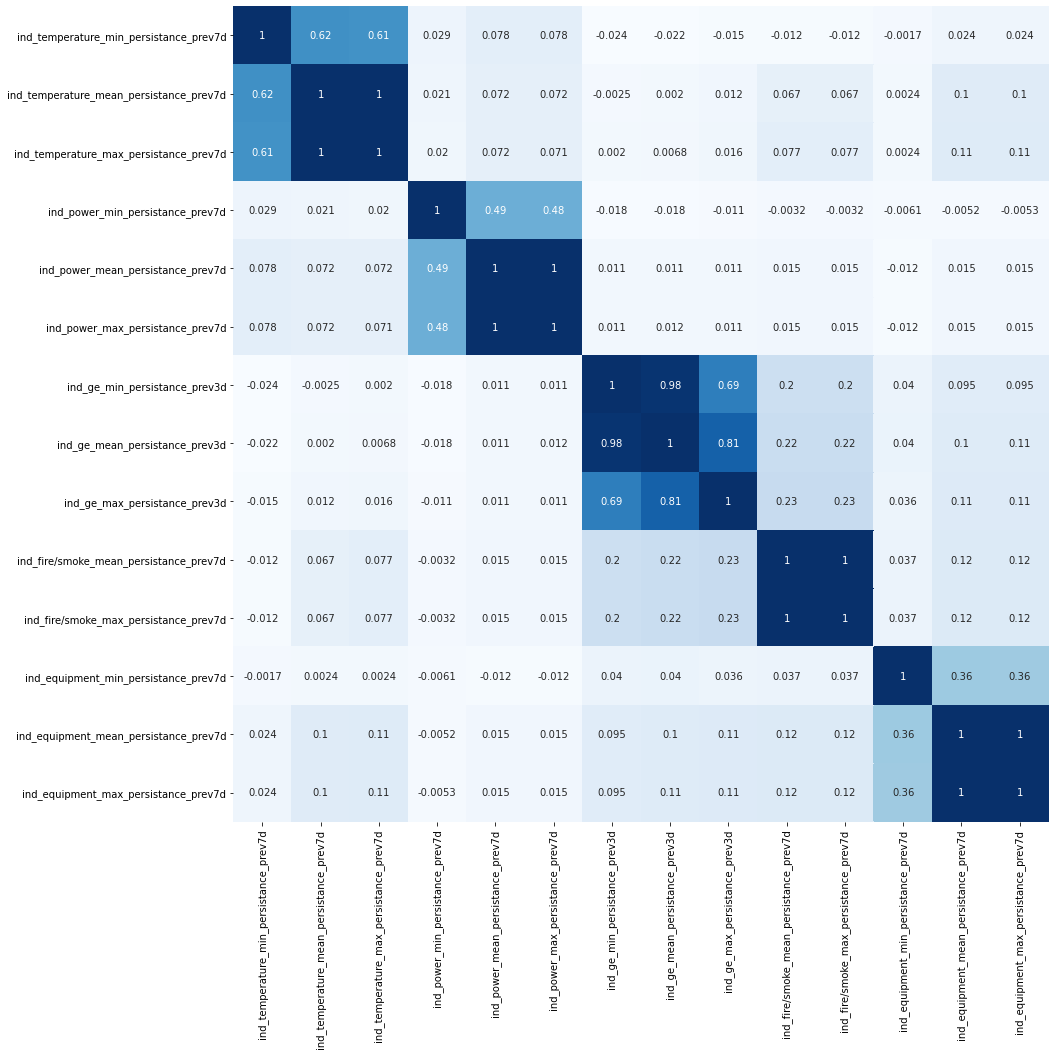

In [48]:
pruned_persistance_cov=pd.concat([pruned_persistance_df], axis=1).corr(method='pearson')
plt.figure(figsize = (15,15))
sns.heatmap(pruned_persistance_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

we compare the correlation between features and remove one of two features that have a correlation higher than 0.85

In [49]:
pruned_persistance_df = compare_corr_values(pruned_persistance_cov, pruned_persistance_df)

<AxesSubplot:>

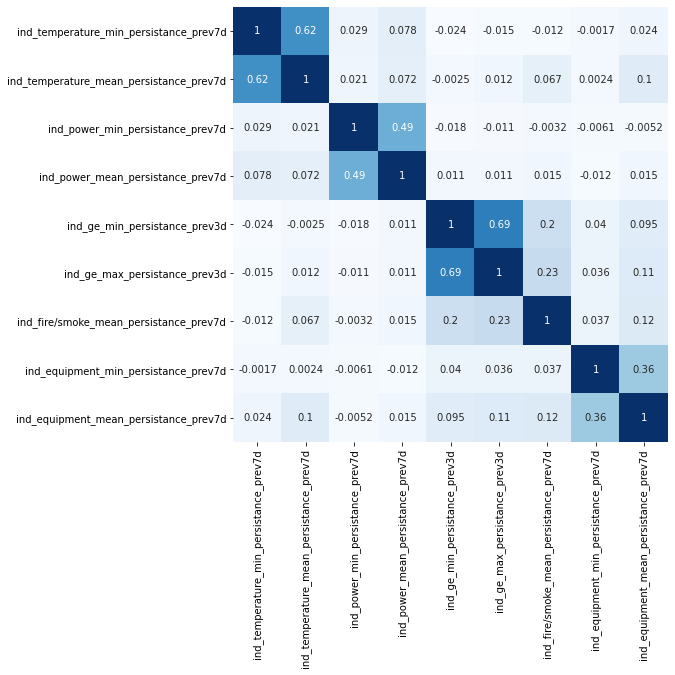

In [50]:
pruned_persistance_cov=pd.concat([pruned_persistance_df], axis=1).corr(method='pearson')
plt.figure(figsize = (8,8))
sns.heatmap(pruned_persistance_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

In [51]:
concat = pd.concat([pruned_persistance_df,pruned_num_df], axis=1)

For aggregating the number of alarm associated to the pre14 prev7 prev3 days we need to use the kurt and skew measures simce they are not normaliaze we need to normalize them

In [52]:
normalized_kurt_cat_alarms_prev14d = normalizer_df(kurt_cat_alarms_prev14d,True,False)
normalized_skew_cat_alarms_prev14d = normalizer_df(skew_cat_alarms_prev14d,True,False)

<AxesSubplot:>

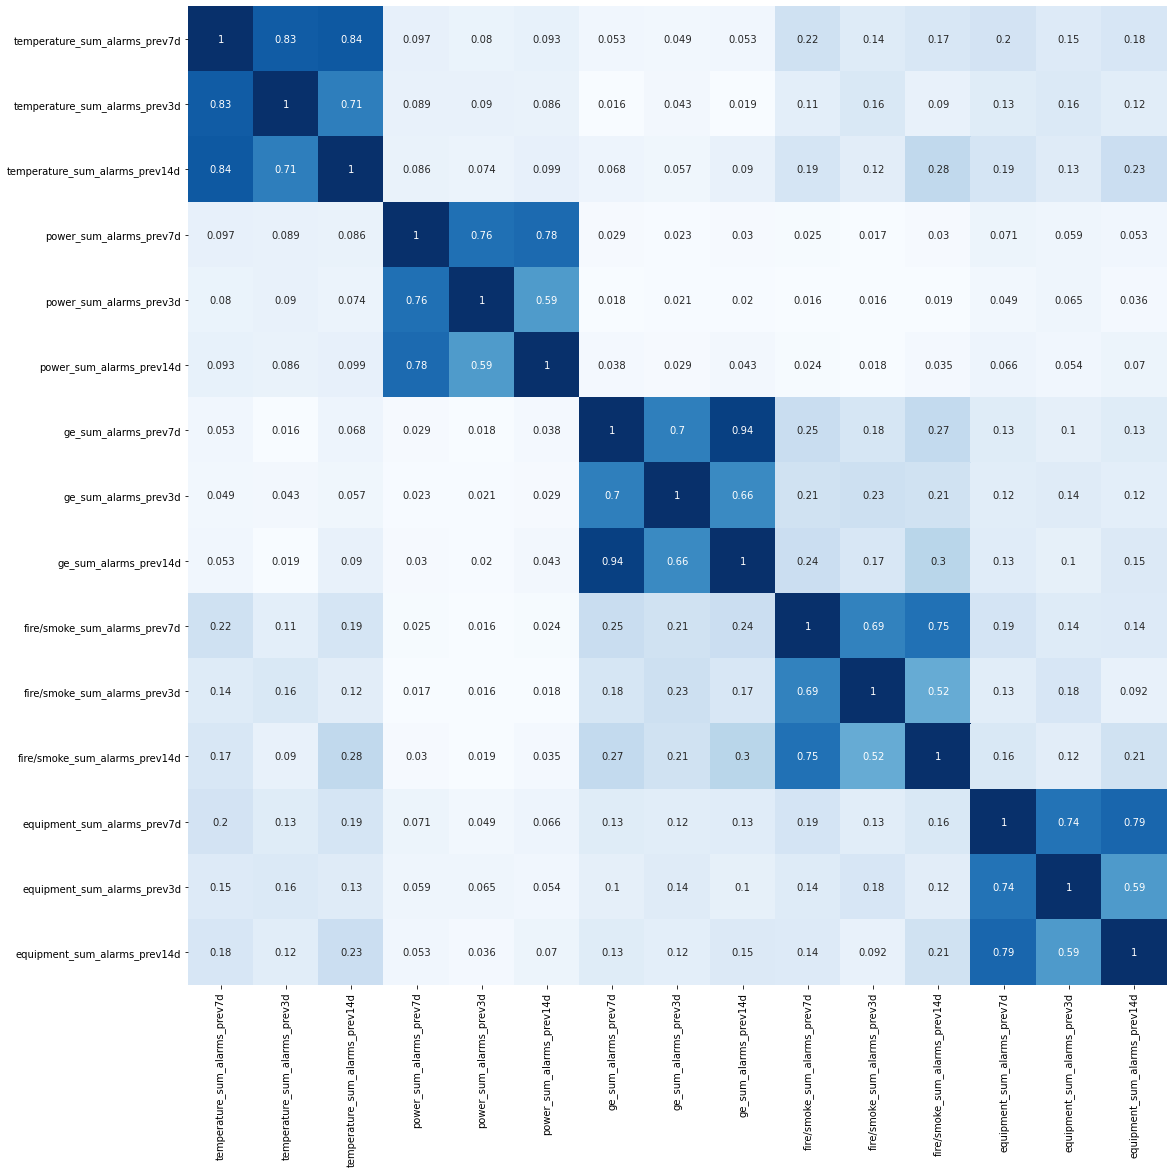

In [53]:
sorted_sum_alarm_df_cov=pd.concat([sorted_sum_alarm_df], axis=1).corr(method='pearson')
plt.figure(figsize = (18,18))
sns.heatmap(sorted_sum_alarm_df_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

as we can see some of the features are highly correlated to each other so using skurt and skew we want to combine them together

In [54]:
sorted_sum_alarm_df = sorted_sum_alarm_df.copy()
sorted_sum_alarm_df_agg = sorted_sum_alarm_df.iloc[0:0, 0:0]
for i in range(len(normalized_kurt_cat_alarms_prev14d.columns)):

    lentype = len(sorted_sum_alarm_df.columns)-i*3
    kurt = normalized_kurt_cat_alarms_prev14d.iloc[:,i]
    skew = normalized_skew_cat_alarms_prev14d.iloc[:,i]
    name = sorted_sum_alarm_df.iloc[:,lentype-2].name
    sorted_sum_alarm_df_agg.loc[((kurt <= 0 )| (kurt >= -1)) & 
                            ((skew <= -0.2) | (skew >= -1)), 
                            'aggregated_'+name] = (14*sorted_sum_alarm_df.iloc[:,lentype-2] + 
                                                        3*sorted_sum_alarm_df.iloc[:,lentype-3] + 
                                                        7*sorted_sum_alarm_df.iloc[:,lentype-4])/(14+3+7)
    sorted_sum_alarm_df_agg.loc[((skew <= -0.2) | (skew >= 0.2)), 
                            'aggregated_'+name] = (7*sorted_sum_alarm_df.iloc[:,lentype-2] + 
                                                        7*sorted_sum_alarm_df.iloc[:,lentype-3] + 
                                                        14*sorted_sum_alarm_df.iloc[:,lentype-4])/(14+7+7)
    sorted_sum_alarm_df_agg.loc[((kurt <= 0 )| (kurt >= 1)) & 
                            ((skew <= -0.2) | (skew >= -1)), 
                            'aggregated_'+name] = (14*sorted_sum_alarm_df.iloc[:,lentype-2] + 
                                                        1*sorted_sum_alarm_df.iloc[:,lentype-3] + 
                                                        2*sorted_sum_alarm_df.iloc[:,lentype-4])/(14+2+1)
    sorted_sum_alarm_df_agg.loc[((kurt <= 0 )| (kurt >= -1)) & 
                            ((skew <= 0.2) | (skew >= 1)), 
                            'aggregated_'+name] = (3*sorted_sum_alarm_df.iloc[:,lentype-2] + 
                                                        3*sorted_sum_alarm_df.iloc[:,lentype-3] + 
                                                        14*sorted_sum_alarm_df.iloc[:,lentype-4])/(14+3+3)
    sorted_sum_alarm_df_agg.loc[((kurt <= 0 )| (kurt >= 1)) & 
                            ((skew <= 0.2) | (skew >= 1)), 
                            'aggregated_'+name] = (2*sorted_sum_alarm_df.iloc[:,lentype-2] + 
                                                        14*sorted_sum_alarm_df.iloc[:,lentype-3] + 
                                                        3*sorted_sum_alarm_df.iloc[:,lentype-4])/(14+3+2)
    

<AxesSubplot:>

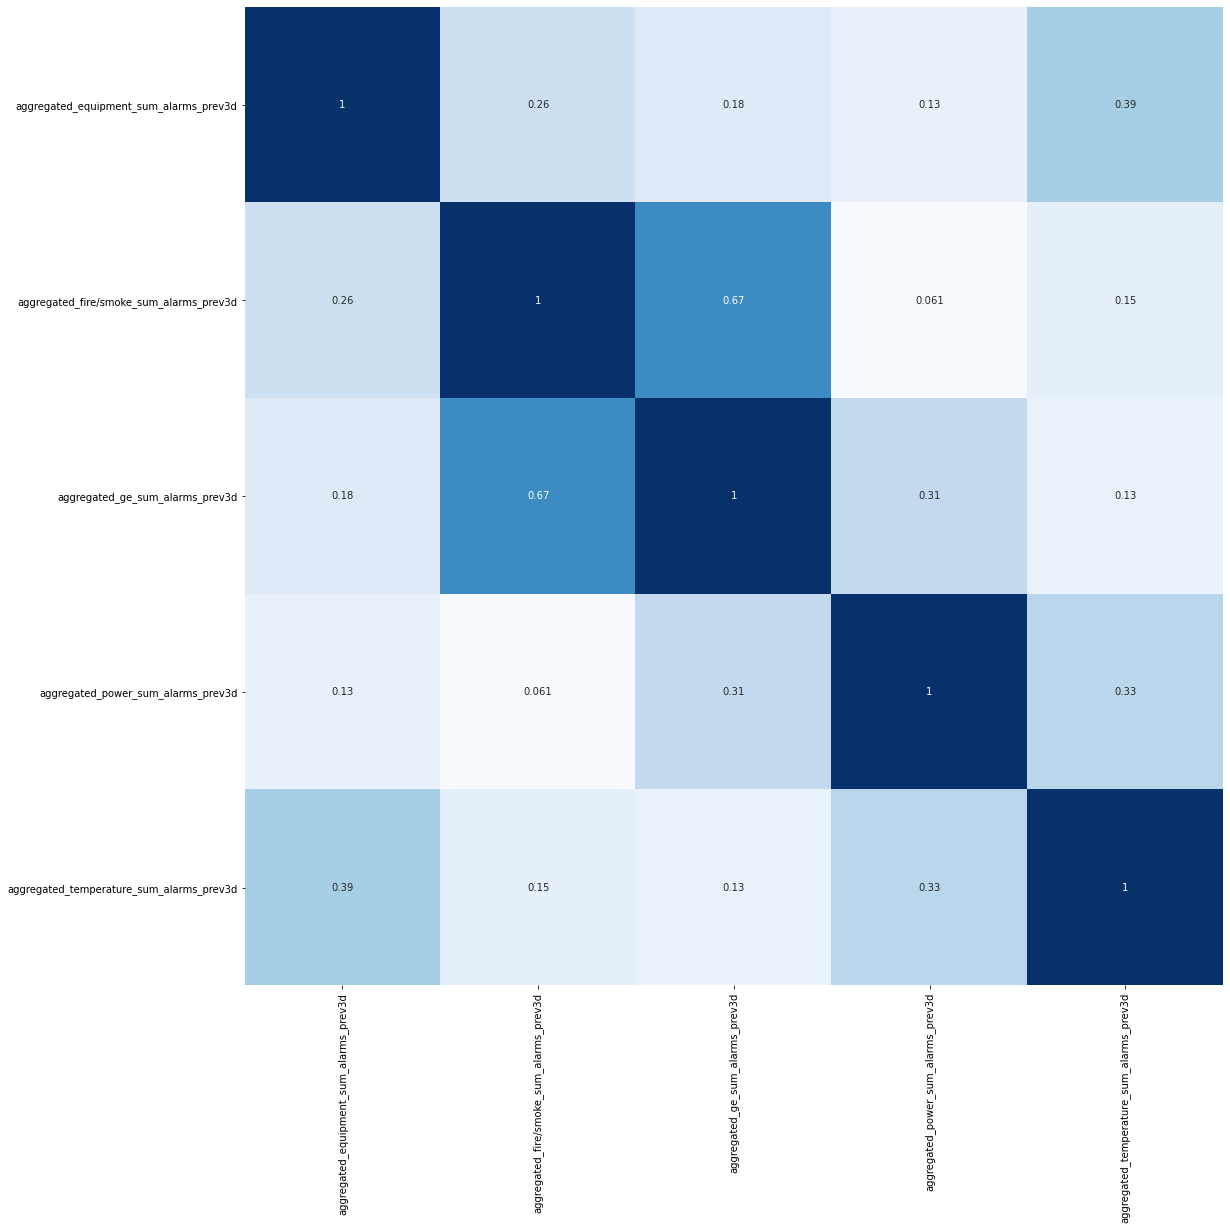

In [55]:
sorted_sum_alarm_df_cov=pd.concat([sorted_sum_alarm_df_agg], axis=1).corr(method='pearson')
plt.figure(figsize = (18,18))
sns.heatmap(sorted_sum_alarm_df_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

In [56]:
concat_df = pd.concat([categorical_df, aircon_sum_wo_df, concat, sorted_sum_alarm_df_agg, skwurt], axis = 1)

In [57]:
concat_df.describe()

,CELL_TYPE_Macro,CELL_TYPE_Mobil,CELL_TYPE_Tx site,CELL_TYPE_micro,GEOGRAPHIC_CLUSTER_K_0,GEOGRAPHIC_CLUSTER_K_1,GEOGRAPHIC_CLUSTER_K_2,GEOGRAPHIC_CLUSTER_K_3,GEOGRAPHIC_CLUSTER_K_4,GEOGRAPHIC_CLUSTER_K_5,...,skew_equipment_alarms_prev14d,skew_fire/smoke_alarms_prev14d,skew_ge_alarms_prev14d,skew_power_alarms_prev14d,skew_temperature_alarms_prev14d,kurt_equipment_alarms_prev14d,kurt_fire/smoke_alarms_prev14d,kurt_ge_alarms_prev14d,kurt_power_alarms_prev14d,kurt_temperature_alarms_prev14d
count,160200.000000,160200.000000,160200.000000,160200.000000,160200.000000,160200.000000,160200.000000,160200.000000,160200.000000,160200.000000,...,160200.000000,160200.000000,160200.000000,160200.000000,160200.000000,160200.000000,160200.000000,160200.000000,160200.000000,160200.000000
mean,0.921348,0.005618,0.026217,0.041199,0.123596,0.101124,0.119850,0.054307,0.112360,0.082397,...,0.001852,-0.000448,-0.001303,-0.000650,-0.000286,-0.003418,-0.011123,-0.006040,-0.010835,0.003504
std,0.269195,0.074743,0.159781,0.198750,0.329121,0.301493,0.324787,0.226623,0.315809,0.274969,...,0.601212,0.535153,0.506947,0.614865,0.682383,0.749820,0.605525,0.656211,0.742131,0.730732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.000009,-3.000009,-3.000009,-3.000009,-3.000009,-3.000009,-3.000009,-3.000009,-3.000009,-3.000009
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002023,-0.001613,-0.001817,-0.000933,-0.003250,-0.110310,-0.072172,-0.027132,-0.169451,-0.093387
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002023,-0.001613,-0.001817,-0.000933,-0.003250,-0.110310,-0.072172,-0.027132,-0.128293,-0.047113
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002023,-0.001613,-0.001817,-0.000933,-0.003250,-0.069026,0.013453,-0.027132,-0.128293,-0.047113
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000009,3.000009,3.000009,3.000009,3.000009,3.000009,3.000009,3.000009,3.000009,3.000009


In [59]:
concat_df.to_csv("concat_df_test.csv", index = False)

we now save this to a new csv to avoid doing all the step above for each iteration

### 3.5 Feature Selection 

First we should have a baseline performance to see our progress after each feature selection and select the best one

we start with loading our aggreagated and cleaned data

In [74]:
cleaned_df = pd.read_csv("concat_df.csv")

In [77]:
# defining the targer and input
target_variable = 'aircon_sum_target_next14d'
input_variables = cleaned_df.columns[cleaned_df.columns!=target_variable]
X_origin_df = cleaned_df[input_variables]
y_origin_df = cleaned_df[target_variable]
# X_origin_df = cleaned_df

In [78]:
X_origin_np = np.array(X_origin_df)
y_origin_np = np.array(y_origin_df)

In [ ]:
#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X_origin_df, y_origin_df, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

#### 3.5.1 Random Sampling 
we can see that the data is highly imbalanced. There are two approaches to deal with imbalanced data

**3.5.1 A:** Under sampling. In this approach we under sample the majority class to match minority class

**3.5.1 B:** Over sampling. In this approach we over sample the minirity class but duplicating them and adding small changes to them to match with the majority class


In [ ]:
concat_df_tran = pd.concat([X_train,y_train], axis = 1)

In [ ]:
# Class count
count_class_0, count_class_1 = y_train.value_counts()
print(count_class_0, count_class_1)

***Under Sampling***

In [ ]:
# Divide by class
df_class_0 = concat_df_tran[concat_df_tran[target_variable] == 0]
df_class_1 = concat_df_tran[concat_df_tran[target_variable] == 1]
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under[target_variable].value_counts())

df_test_under[target_variable].value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
def evaluate_base_line(df_in, features = input_variables, should_use_samples = False):
    if should_use_samples:
        X = features
    else:
        X = df_in[features]
    X = np.array(X)
    X = normalizer_df(X)
    y = np.array(df_in[target_variable])
    kfolds = KFold(10,shuffle=True,random_state=0)
    model = linear_model.LogisticRegression(max_iter = 300)
    scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=kfolds, n_jobs=-1)

    print("f1 Mean %.3f StdDev %.3f"%(scores.mean(),scores.std()))
    

In [ ]:
evaluate_base_line(df_test_under)

In [ ]:
kfolds = KFold(10,shuffle=True,random_state=0)

we can see with under sampling techniques we have loss of information so we should try over sampling with more Sophisticated methods for this reason we take help from python and scikit learn libraries

In [ ]:
from sklearn.utils import resample

#Over-sample Minority Class
#1) Separate majority and minority classes
df_majority = concat_df_tran[concat_df_tran[target_variable]==0] #"target" is the name of the target column, change it accordingly to your dataset
df_minority = concat_df_tran[concat_df_tran[target_variable]==1] #"target" is the name of the target column, change it accordingly to your dataset
 
#2) Oversample minority class
df_minority_oversampled = resample(df_minority, 
                                   replace=True,
                                   n_samples=100000,     # number of samples into the minority class (change it accordingly to your dataset)
                                   random_state=123)  # reproducible results
 
#3) Combine oversampled minority class with majority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])
 
#4) Display new class counts
df_oversampled[target_variable].value_counts() #"target" is the name of the target column, change it accordingly to your dataset

In [ ]:
evaluate_base_line(df_oversampled)

#### 3.5.1 Random Forest
We now apply a random forest and use its scoring to select the attributes. we apply this on the original data without sampling

In [ ]:
forest = ExtraTreesRegressor(n_estimators=250, random_state=0)
forest.fit(X_origin_np, y_origin_np)

Let's plot the feature importance.

In [ ]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
columns_name = []
# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    columns_name.append(X_origin_df.columns[indices[f]])
    print("%2d. feature %2d %7s (%.3f)" % (f + 1, indices[f], X_origin_df.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize = (60,60))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), columns_name,rotation=90, fontsize = 32)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
feature_selection_model = SelectFromModel(forest, prefit=True)

In [ ]:
X_selected_features_forest = feature_selection_model.transform(np.array(df_oversampled[input_variables]))
X_selected_features_forest.shape

At this point, it would be interesting to compare the performance of our target algorithm on the reduced datasets.

In [ ]:
# forest_model = linear_model.LogisticRegression()
# forest_scores = cross_val_score(forest_model, X_selected_features_forest, df_oversampled[target_variable], cv=kfold)
# print("RF Selected Features Model R2 Mean %.3f StdDev %.3f"%(forest_scores.mean(),forest_scores.std()))
evaluate_base_line(df_oversampled, X_selected_features_forest, True)

# VarianceThreshold

In [ ]:
feature_selection_variance_model = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_selected_features_variance = feature_selection_variance_model.fit_transform(X_origin_np)


mask = feature_selection_variance_model.get_support() #list of booleans
print("Reduced data set shape = ", X_selected_features_variance.shape)
print("     Selected features = ", input_variables[mask])
print("      Deleted Features = ", input_variables[~mask])

In [ ]:
evaluate_base_line(df_oversampled, input_variables[mask])

## PCA

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

full_pca_model = PCA()
X_std = StandardScaler().fit_transform(X_origin_np)
full_fitted_model = full_pca_model.fit(X_std)

In [80]:
full_fitted_model.explained_variance_ratio_.shape

(47,)

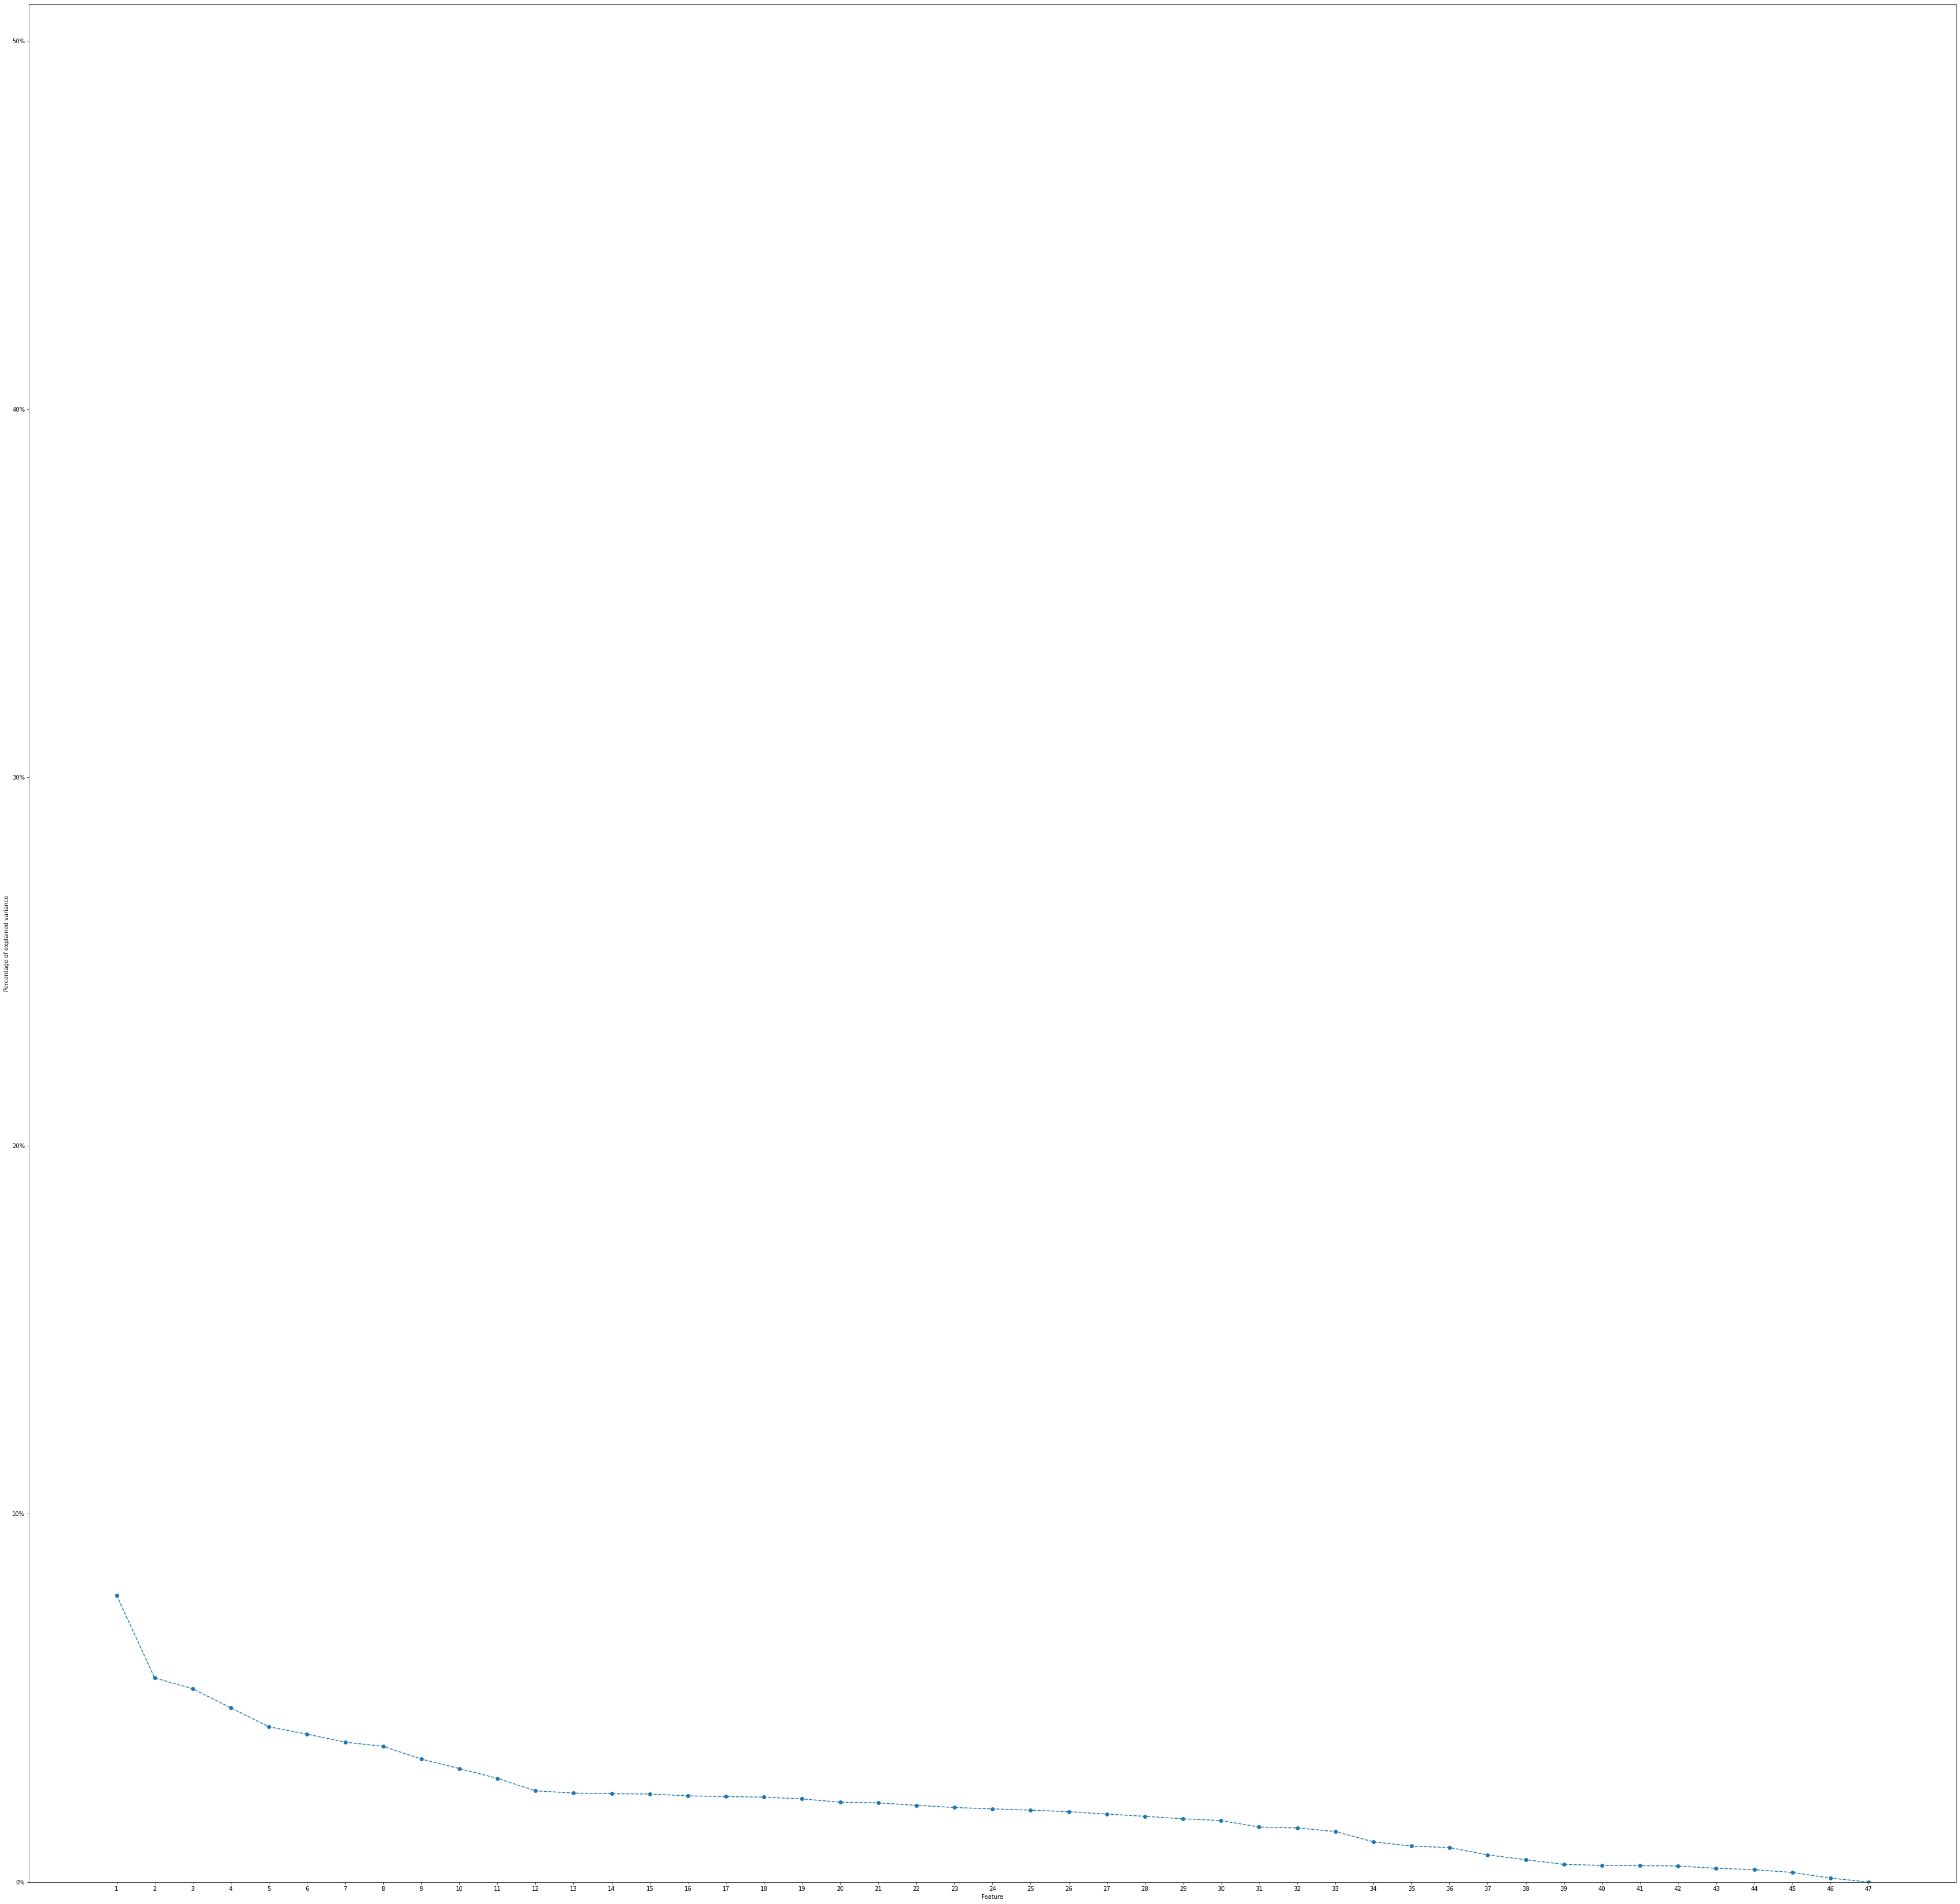

In [81]:
plt.figure(figsize=(60, 60));
plt.plot(full_fitted_model.explained_variance_ratio_, '--o');
plt.xticks(np.arange(0,47,1),labels=np.arange(1,48,1));
plt.xlabel("Feature");
plt.ylabel("Percentage of explained variance");
plt.xticks(np.arange(0,47,1),labels=np.arange(1,48,1));
plt.yticks(np.arange(0.0,0.51,.1),labels=["%.0f%%"%(x*100) for x in np.arange(0.0,0.51,.1)]);
plt.ylim([0.0,0.51]);


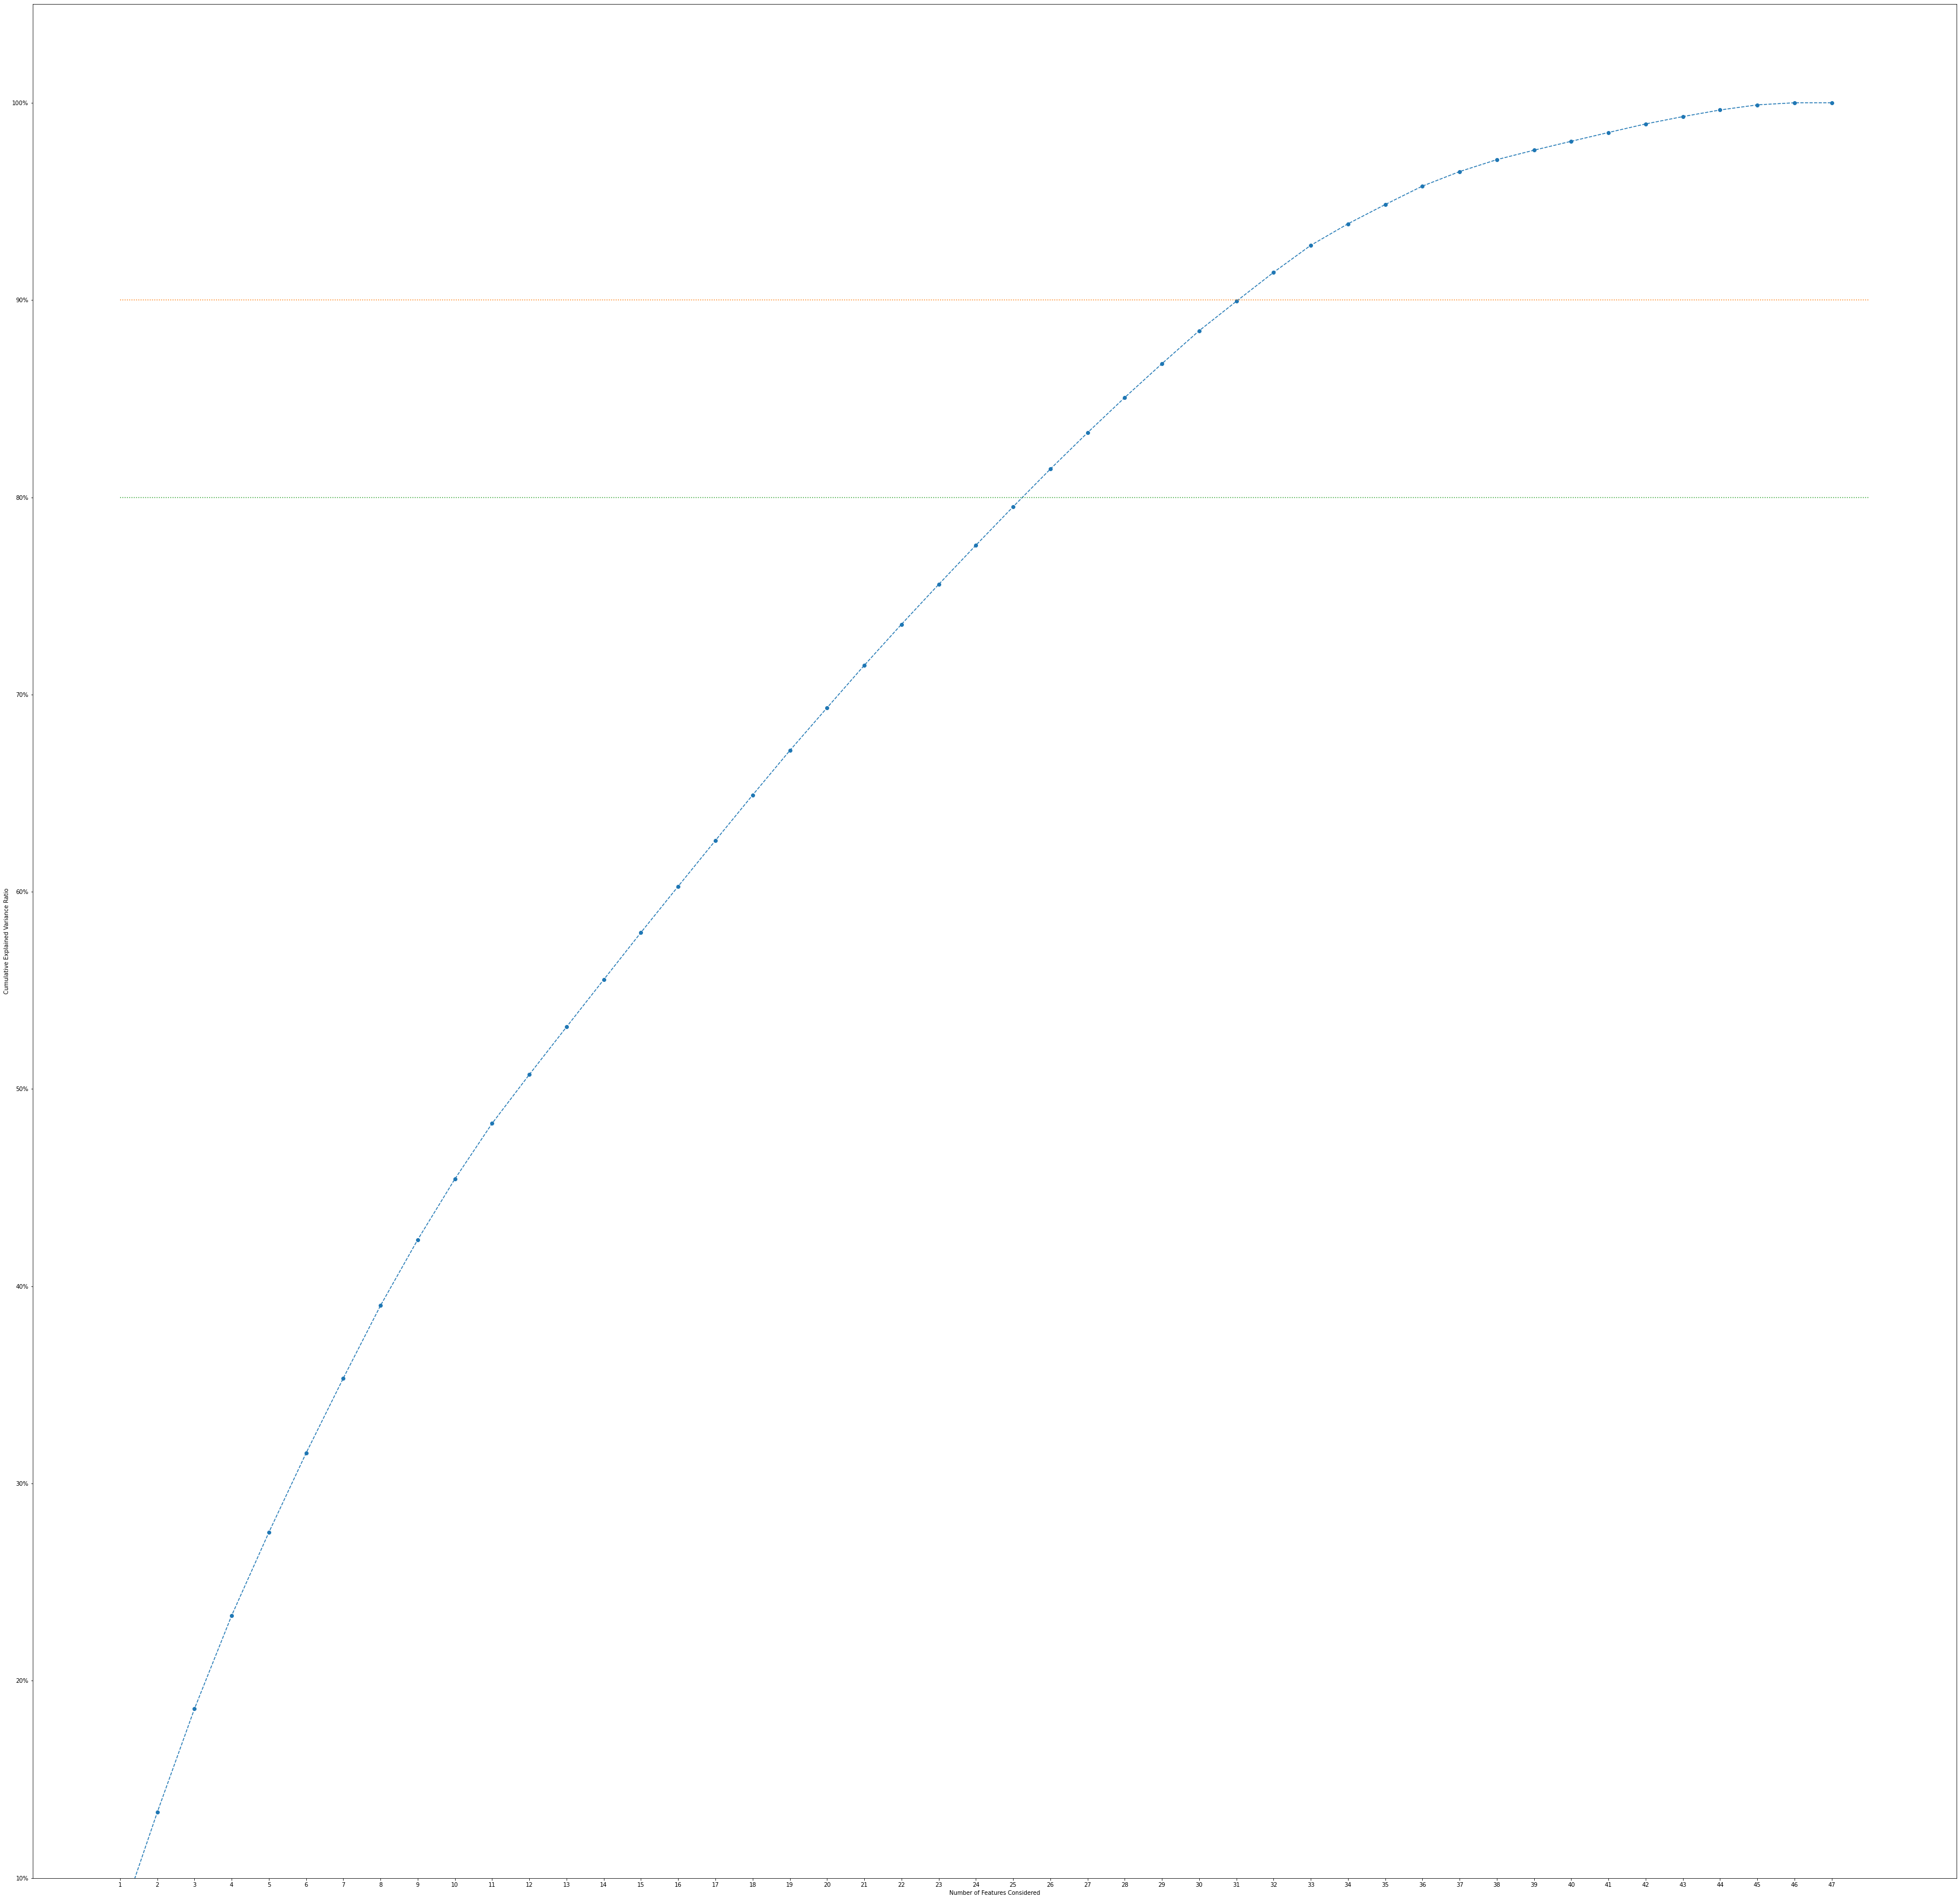

In [82]:
plt.figure(figsize=(60, 60));

plt.plot(full_fitted_model.explained_variance_ratio_.cumsum(), '--o');
plt.xticks(np.arange(0,47,1),labels=np.arange(1,48,1));
plt.yticks(np.arange(0.1,1.1,.1),labels=["%.0f%%"%(x*100) for x in np.arange(0.1,1.1,.1)]);
plt.ylim([0.1,1.05]);
plt.plot([0,47],[.9,.9],':');
plt.plot([0,47],[.8,.8],':');
plt.xlabel("Number of Features Considered");
plt.ylabel("Cumulative Explained Variance Ratio");


In [83]:
feature_selection_pca_model = PCA(n_components=32)
fitted_model = feature_selection_pca_model.fit(X_std)

X_selected_features_pca = fitted_model.transform(np.array(X_origin_np))
print("    Explained Variance = %.3f" % fitted_model.explained_variance_ratio_.cumsum()[-1])
print("Reduced data set shape =",X_selected_features_pca.shape)

    Explained Variance = 0.914
Reduced data set shape = (621300, 32)


In [84]:
X_selected_features_pca_original = fitted_model.transform(np.array(X_origin_df))

In [85]:
np.savetxt("PCA_origin.csv", X_selected_features_pca_original, delimiter=",")

In [ ]:
evaluate_base_line(df_oversampled, X_selected_features_pca, True)

In [ ]:
np.savetxt("PCS.csv", X_selected_features_pca, delimiter=",")

# K-Best

In [ ]:
# Feature Selection
X_origin_norm = normalizer_df(X_origin_df,False,False, (0,1))
selector= SelectKBest(chi2,k=30).fit(X_origin_norm,y_origin_np)

# Get idxs of columns to keep
idxs_selected= selector.get_support(indices=True)
idxs_selected
input_variables[idxs_selected]

In [ ]:
train_data_selected=df_oversampled.loc[:,input_variables[idxs_selected]]

In [ ]:
evaluate_base_line(df_oversampled, X_selected_features_pca, True)

We can see that k-best and PCA works good with 30 features. 